# **MVP Análise de Dados e Boas Práticas**

**Nome:** Nahanni Taynah Jácome Rodrigues

**Matrícula:** 4052025000359

**Dataset:** Smiles Dataset

# **Descrição do Problema abordado**

A espectroscopia de infravermelho (IR) é uma técnica amplamente utilizada na química para identificação de grupos funcionais em moléculas com base em suas vibrações moleculares. Cada grupo funcional apresenta um padrão específico de absorção de energia em determinadas faixas de frequência, permitindo que os espectros IR funcionem como "impressões digitais" moleculares.

Com o avanço de métodos computacionais, como a Teoria do Funcional da Densidade (DFT), tornou-se possível simular espectros IR de milhares de compostos orgânicos com precisão e rapidez. Isso gera uma oportunidade de aplicar técnicas de aprendizado de máquina (machine learning) para automatizar a interpretação desses espectros e classificar compostos com base em suas características químicas.

Neste experimento, busca-se construir modelos de ML capazes de:

Identificar automaticamente a presença do grupo funcional carbonila (classificação binária);

Distinguir entre os tipos de grupos carbonila (cetonas, ácidos carboxílicos e outros) a partir do espectro IR simulado (classificação multiclasse).

A aplicação de algoritmos de ML a esse problema pode acelerar significativamente análises químicas, reduzir erros humanos e oferecer suporte a pesquisas em química computacional, farmacologia e materiais.

# Hipóteses
É possível prever a presença de um grupo funcional específico (carbonila) em uma molécula apenas com base em seu espectro IR?

➤ Objetivo: Avaliar se os modelos de ML conseguem identificar padrões vibracionais característicos da carbonila.

Quais algoritmos de ML são mais eficazes para essa tarefa de classificação espectral?

➤ Objetivo: Comparar o desempenho de algoritmos como Random Forest, SVM, k-NN, Redes Neurais, etc.

Como o pré-processamento dos dados (ex: normalização, seleção de picos, redução de dimensionalidade) influencia a acurácia dos modelos?

➤ Objetivo: Testar diferentes pipelines de preparação de dados e avaliar seus impactos.

É possível diferenciar entre tipos de carbonilas com base nas sutis variações nos espectros?

➤ Objetivo: Avaliar a capacidade dos modelos de ML em capturar as diferenças entre cetonas, ácidos carboxílicos e outros compostos carbonílicos.

Quais características espectrais mais contribuem para a classificação correta?

➤ Objetivo: Identificar regiões/frequências-chave no espectro (feature importance) que os modelos usam para tomar decisões.

# Tipo de problema

Esse problema é de aprendizagem supervisionada, pois a partir de dados de espectroscopia de infravermelho busca-se identificar se as moléculas possuem ou não o grupo carbonila.

# Seleção dos dados
Os dados que serão utilizados nesse MVP  usa a Alexandria Library, um conjunto de dados computacional contendo uma variedade de propriedades moleculares calculadas para 2.704 compostos diferentes usando
diferentes modelos químicos. Na Engenharia Química, ferramentas computacionais, como a Análise de dados, assim como modelos de Machine Learning, podem auxiliar na investigação de dados como os presentes nesse projeto.


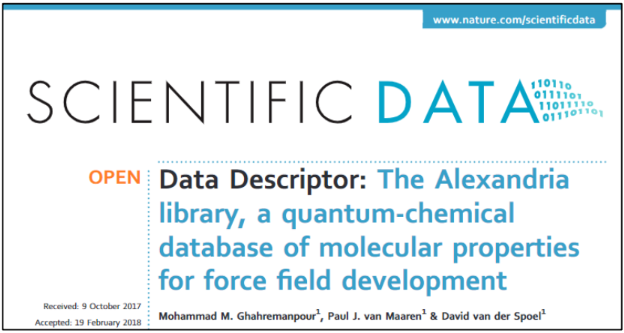

O conjunto de dados específico usado neste experimento contém as frequências
vibracionais de 2.337 moléculas calculadas usando a teoria da densidade funcional (DFT) com o
funcional híbrido B3LYP e o conjunto base aug-cc-pVTZ, designado como B3LYP-aug-cc-pVTZ.
As frequências vibracionais calculadas são uma série de linhas com intensidades
correspondentes à força do oscilador de cada modo vibracional.
Para simular espectros de absorção IR, essas frequências vibracionais devem ser
convolutas com uma função que representa a forma do pico. Este experimento usa uma função
Lorentziana:
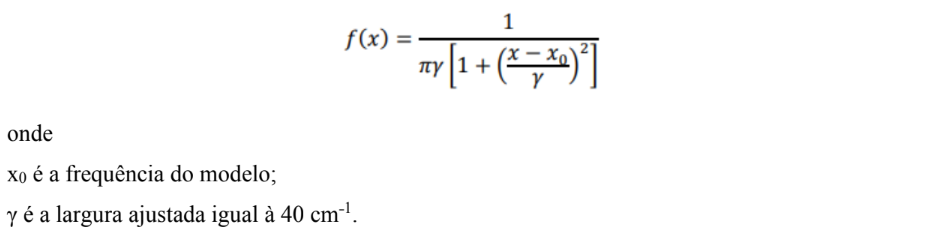

Dos espectros resultantes, 90% (2.104 espectros) devem ser usados como dados de treinamento e 10% (233 espectros) devem ser usados como dados de teste. Para a tarefa de classificação multiclasse na Parte III deste experimento, o conjunto de dados total contém os espectros de 351 moléculas contendo carbonila, das quais 90% (316 espectros) são usados como dados de treinamento e 10% (35 espectros) são usados como dados de
teste .

# Atributos do dataset


O conjunto de dados específico usado neste experimento contém as frequências vibracionais de 2.337 moléculas, apresentadas da seguinte forma:

* Cada linha contém dados para uma molécula diferente.
* Os números à esquerda da primeira coluna (0, 1, ...) representam o índice de cada linha.
* A primeira coluna ("SMILES") contém a string da molécula SMILES (mais sobre isso depois).
* A segunda coluna ("nome") contém o nome da molécula.
* A terceira coluna ("rótulo") contém um número que indica se a molécula contém (1) ou não (0) um grupo carbonila
* Os números no topo das colunas restantes (500, 502, ..., 3998, 4000) representam a frequência vibracional em números de onda, e os números abaixo de cada frequência representam a intensidade vibracional de cada molécula naquela frequência.

# **Carregando as Bibliotecas do Python e Carga dos dados**

As bibliotecas necessárias para a elaboração desse notebook estão sendo chamadas a seguir:

In [4]:
import pandas as pd
import numpy as np

# Para normalização
from sklearn import preprocessing

# Para visualização
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Algoritmos de ML de Classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Para data imbalance, SMOTE
from imblearn.over_sampling import SMOTE
from scipy import stats

# Para calcular a performance dos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

**Instalando o módulo RDKit**

* Para observar a estrutura da molécula, será usado o módulo RDKit.

In [5]:
import sys
!time pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 43.9 MB/s eta 0:00:00

real	0m6.007s
user	0m4.299s
sys	0m0.764s


In [7]:
try:
  from rdkit import Chem
  from rdkit.Chem import Draw
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
  exit()

**Carregando os Dados**

Em seguida, serão carregados os conjuntos de dados para treinamento e teste.

Com o método *pd.read_csv()*, os arquivos CSV salvos no Github são lidos a partir da sua url como uma estrutura DataFrame, que é semelhante a uma tabela.

Links dos dados disponibilizados no Github em arquivos csv, sendo eles:


*   Dados de treino;
*   Dados de teste;
*   Dados de teste ruins (baixa qualidade).





In [9]:
url_1 = "https://media.githubusercontent.com/media/nahanni-rodrigues/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/binary_train.csv"
url_2 = "https://raw.githubusercontent.com/nahanni-rodrigues/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/binary_test.csv"
url_3 = "https://raw.githubusercontent.com/nahanni-rodrigues/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/binary_test_baddata.csv"

In [10]:
# Carregando os dados de treinamento e salvando na variável "train"
train = pd.read_csv(url_1, index_col=0)
# Carregando os dados de teste e salvando na variável "test"
test = pd.read_csv(url_2, index_col=0)

In [11]:
# Carregando os dados de treinamento e salvando na variável "train"
train_1 = pd.read_csv(url_1, index_col=0)
# Carregando os dados de teste e salvando na variável "test"
test_1 = pd.read_csv(url_2, index_col=0)

In [12]:
# Carregando os dados de teste "ruim" e salvando na variável "test_bad"
test_bad = pd.read_csv(url_3, index_col=0)

In [13]:
# Carregando os dados para treinamento sem SMOTE
train_2 = pd.read_csv(url_1, index_col=0)
# Carregando os dados de teste e salvando na variável "test"
test_2 = pd.read_csv(url_2, index_col=0)

In [14]:
#Removendo dados de treinamento original para avaliar a influencia da quantiade de registros no treinamento dos modelos de machine learning
train_drop1 = train.drop(train.index[1104:2104])
train_drop2 = train.drop(train.index[1304:2104])
train_drop3 = train.drop(train.index[1504:2104])
train_drop4 = train.drop(train.index[1704:2104])
train_drop5 = train.drop(train.index[1904:2104])

Abaixo está a visualização de como estão os dados obtidos para a vaiável train, podemos verificar as colunas disponíveis no dataset, quantas colunas existem, as moléculas, seus nomes...

In [15]:
train

,SMILES,name,label,500,502,504,506,508,510,512,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,COC1OCCO1,2-methoxy-13-dioxolane,0,0.000051,0.000051,0.000052,0.000052,0.000053,0.000053,0.000054,...,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
1,CCCCCC=O,hexanal,1,0.000121,0.000126,0.000131,0.000136,0.000141,0.000146,0.000151,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
2,CC1CCC(C)C1C,1R2R3S-123-trimethylcyclopentane,0,0.000013,0.000013,0.000013,0.000013,0.000012,0.000012,0.000012,...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
3,c1cn[se]c1,12-selenazole,0,0.000243,0.000244,0.000245,0.000246,0.000248,0.000249,0.000251,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
4,CCC(C)=CC(C)C,3E-24-dimethylhex-3-ene,0,0.000053,0.000053,0.000053,0.000054,0.000054,0.000054,0.000054,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,c1c[nH]cn1,imidazole,0,0.001059,0.001111,0.001166,0.001222,0.001282,0.001343,0.001406,...,0.000019,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000017,0.000017,0.000017
2100,C=C[Si](C)(Cl)Cl,methyl-vinyl-dichlorosilane,0,0.001328,0.001328,0.001327,0.001326,0.001324,0.001323,0.001322,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2101,CCC=CCl,1E-1-chloro-1-butene,0,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007
2102,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,perfluoro-n-pentane,0,0.000111,0.000114,0.000117,0.000121,0.000124,0.000128,0.000131,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002


# Análise dos dados

A intensidade vibracional em cada frequência é um atributo ou feature. Esses termos se referem a uma propriedade que pode assumir valores diferentes para diferentes membros do conjunto de dados. Desses dados 90% (2.104 espectros) devem ser usados como dados de treinamento e 10% (233 espectros) devem ser usados como dados de teste.

In [16]:
print(f"Total de instâncias: {len(train)}")
print("\nTipos de dados por coluna:")
print(train.info())

Total de instâncias: 2104

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 2104 entries, 0 to 2103
Columns: 1754 entries, SMILES to 4000
dtypes: float64(1751), int64(1), object(2)
memory usage: 28.2+ MB
None


In [17]:
# Estatísticas descritivas básicas do dataset
train.describe()

,label,500,502,504,506,508,510,512,514,516,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
count,2104.000000,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,...,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03
mean,0.146388,2.663383e-04,2.663760e-04,2.663768e-04,2.663545e-04,2.663184e-04,2.662819e-04,2.662559e-04,2.662520e-04,2.662790e-04,...,1.788476e-05,1.782101e-05,1.775215e-05,1.767250e-05,1.758295e-05,1.747777e-05,1.735750e-05,1.722018e-05,1.706602e-05,1.689533e-05
std,0.353579,6.489370e-04,6.427368e-04,6.361670e-04,6.292978e-04,6.222035e-04,6.149589e-04,6.076398e-04,6.003225e-04,5.930838e-04,...,9.210131e-05,9.364612e-05,9.505487e-05,9.627605e-05,9.726391e-05,9.797910e-05,9.839158e-05,9.848101e-05,9.823859e-05,9.766710e-05
min,0.000000,6.910000e-07,6.960000e-07,7.010000e-07,7.060000e-07,7.110000e-07,7.160000e-07,7.210000e-07,7.270000e-07,7.320000e-07,...,9.440000e-08,9.440000e-08,9.440000e-08,9.440000e-08,9.440000e-08,9.440000e-08,9.440000e-08,9.440000e-08,9.440000e-08,9.440000e-08
25%,0.000000,5.227500e-05,5.280000e-05,5.337500e-05,5.375000e-05,5.390000e-05,5.417500e-05,5.437500e-05,5.480000e-05,5.560000e-05,...,2.747500e-06,2.737500e-06,2.737500e-06,2.727500e-06,2.717500e-06,2.707500e-06,2.700000e-06,2.697500e-06,2.687500e-06,2.677500e-06
50%,0.000000,1.062730e-04,1.076060e-04,1.077230e-04,1.079365e-04,1.084335e-04,1.085895e-04,1.095470e-04,1.099925e-04,1.108545e-04,...,6.710000e-06,6.685000e-06,6.645000e-06,6.605000e-06,6.580000e-06,6.555000e-06,6.530000e-06,6.510000e-06,6.480000e-06,6.455000e-06
75%,0.000000,2.253483e-04,2.254895e-04,2.263545e-04,2.290895e-04,2.322860e-04,2.327248e-04,2.338888e-04,2.343785e-04,2.373928e-04,...,1.200000e-05,1.190000e-05,1.182500e-05,1.180000e-05,1.170000e-05,1.170000e-05,1.160000e-05,1.160000e-05,1.150000e-05,1.150000e-05
max,1.000000,7.658154e-03,7.746889e-03,7.798594e-03,7.811749e-03,7.785963e-03,7.722000e-03,7.641874e-03,7.709683e-03,7.739832e-03,...,1.626613e-03,1.676070e-03,1.720531e-03,1.758950e-03,1.790353e-03,1.813893e-03,1.828907e-03,1.834954e-03,1.831858e-03,1.819709e-03


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [18]:
# Média dos atributos numéricos do dataset
train.describe().loc['mean']

,mean
label,0.146388
500,0.000266
502,0.000266
504,0.000266
506,0.000266
...,...
3992,0.000017
3994,0.000017
3996,0.000017
3998,0.000017


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [19]:
# Desvio padrão dos atributos numéricos do dataset
train.describe().loc['std']

,std
label,0.353579
500,0.000649
502,0.000643
504,0.000636
506,0.000629
...,...
3992,0.000098
3994,0.000098
3996,0.000098
3998,0.000098


## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.

In [20]:
# Estatísticas descritivas agrupadas por espécie
train.groupby('label').describe()

500                                                                  \
        count      mean       std           min       25%       50%       75%   
label                                                                           
0      1796.0  0.000291  0.000698  6.910000e-07  0.000053  0.000114  0.000239   
1       308.0  0.000123  0.000119  5.400000e-06  0.000051  0.000083  0.000133   

                    502            ...      3998              4000            \
            max   count      mean  ...       75%       max   count      mean   
label                              ...                                         
0      0.007658  1796.0  0.000291  ...  0.000012  0.001832  1796.0  0.000019   
1      0.000864   308.0  0.000123  ...  0.000010  0.000036   308.0  0.000007   

                                                                       
            std           min       25%       50%       75%       max  
label                                                                  
0      0.000106  9.440000e-08  0.000002  0.000007  0.000012  0.001820  
1      0.000005  1.640000e-06  0.000003  0.000005  0.000010  0.000035  

[2 rows x 14008 columns]

Por se tratar de dados de frequência, não tem uma variável específica que possamos observar a distribuição através de um gráfico de boxplot. Pois são muitas colunas e elas não representam uma medida específica que possa ser feito uma leitura do gráfico de forma compreenssível.

*Lembretes:*

Frequentemente, precisaremos acessar os valores armazenados em posições específicas em uma variável. Podemos fazer isso usando os índices correspondentes a essa posição:

* iloc[índice da linha, índice da coluna] é usado para seleção de dados baseada em posição.
* **:** é usado para selecionar um intervalo de índices.
* Lembrar que em Python, os índices começam em 0 em vez de 1.

In [21]:
train.iloc[5,0]

'[O]C(=O)C1=CC(=O)C(C([O])=O)=CC1=O'

In [22]:
train.iloc[0:5,0:10]

,SMILES,name,label,500,502,504,506,508,510,512
0,COC1OCCO1,2-methoxy-13-dioxolane,0,0.000051,0.000051,0.000052,0.000052,0.000053,0.000053,0.000054
1,CCCCCC=O,hexanal,1,0.000121,0.000126,0.000131,0.000136,0.000141,0.000146,0.000151
2,CC1CCC(C)C1C,1R2R3S-123-trimethylcyclopentane,0,0.000013,0.000013,0.000013,0.000013,0.000012,0.000012,0.000012
3,c1cn[se]c1,12-selenazole,0,0.000243,0.000244,0.000245,0.000246,0.000248,0.000249,0.000251
4,CCC(C)=CC(C)C,3E-24-dimethylhex-3-ene,0,0.000053,0.000053,0.000053,0.000054,0.000054,0.000054,0.000054


**Plotando os Espectros**

Vamos olhar para os espectros de algumas moléculas para ver como elas se parecem.

* Para visualização: plotly- line chart.

* Pode-se adicionar um traço usando fig.add_trace(go.Scatter(x= [Variável independente], y=[Variável dependente] ).

* Pode-se escolher quais espectros plotar alterando os índices.

Os valores de índice abaixo se referem aos números de linha no DataFrame de dados de treinamento. Por exemplo, idx_notCarbonyl=1 seleciona a molécula na linha 0 dos dados de treinamento, que é o hexanal. Se você quiser selecionar 12-selenazol na linha 3, altere a linha de código para ler idx_notCarbonyl=3.

In [23]:
# Altera os índices abaixo para escolher moléculas com e sem carbonila
idx_hasCarbonyl=1
idx_notCarbonyl=0
# Obtenção dos dados para as duas moléculas
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:]
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:]
# Plotando o espectro
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name, mode="markers"))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl, name=notCarbonyl.name, mode='markers'))
fig.update_layout(title='Intensities over Frequency', title_x=0.5)

Observa-se que os espectros abrangem a mesma faixa de frequência, mas o valor de intensidade máxima é diferente para cada molécula.

# **Pre-processamento de Dados**

Antes de realizar a análise de aprendizado de máquina, é necessário pré-processar os dados para colocá-los em uma forma padrão. Existem várias etapas envolvidas: normalização, thresholding, divisão de atributo e rótulo e balanceamento de dados.

***Normalização***

Na prática, diferentes espectros de IR podem ser registrados em diferentes concentrações moleculares, de modo que as intensidades absolutas podem não ser diretamente comparáveis. Portanto, normalizaremos os dados antes de realizar a análise.

Aplicaremos um tipo de normalização chamado **normalização min-max** a cada "instância" (ou seja, molécula) e atualizaremos os dados.

* Para cada molécula, as intensidades espectrais serão dimensionadas para variar de 0 a 1;
* Usaremos o método `MinMaxScaler()`;

Esse método executa a seguinte operação:

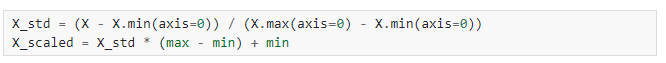

Vamos definir uma função chamada `df_normalize` para realizar essa normalização:

* O primeiro argumento entre parênteses após o nome da função representa os dados a serem normalizados;
* O segundo argumento representa o índice da coluna onde os dados de frequência começam. Se você não fornecer esse argumento, a função usará um valor padrão igual a 3;
* Como exemplo, se os dados de frequência na variável `ex_data` começarem na coluna 4, você escreveria: `df_normalize(ex_data,4)`.

In [24]:
# Definir a função para realizar a min-max normalization
def df_normalize(df,i=3):
  """
  aplica min-max_scaler em cada linha, já que a função
  min-max_scaler originalmente se aplica à colunas.
  """
  min_max_scaler = preprocessing.MinMaxScaler()
  df.iloc[:,i:] = min_max_scaler.fit_transform(df.iloc[:,i:].T).T

In [25]:
# Usar a função para normalizar os dados de treinamento e teste
df_normalize(train)
df_normalize(test)

In [26]:
# Usar a função para normalizar os dados de treinamento e teste
df_normalize(train_1)
df_normalize(test_1)

In [27]:
# Usar a função para normalizar os dados de teste ruim
df_normalize(test_bad)

In [28]:
# Usar a função para normalizar os dados de treinamento e teste
df_normalize(train_2)
df_normalize(test_2)

In [29]:
# Usar a função para normalizar os dados de treinamento e teste para os dados com remoção de linhas
df_normalize(train_drop1)
df_normalize(train_drop2)
df_normalize(train_drop3)
df_normalize(train_drop4)
df_normalize(train_drop5)

Abaixo pode-se visualizar os dados de treinamento após a aplicação da normalização.

In [30]:
train

,SMILES,name,label,500,502,504,506,508,510,512,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,COC1OCCO1,2-methoxy-13-dioxolane,0,0.015896,0.015998,0.016134,0.016271,0.016441,0.016646,0.016816,...,0.000048,0.000041,0.000037,0.000031,0.000027,0.000020,0.000014,0.000010,0.000003,0.000000
1,CCCCCC=O,hexanal,1,0.045622,0.047591,0.049594,0.051613,0.053624,0.055599,0.057507,...,0.000109,0.000097,0.000085,0.000072,0.000060,0.000048,0.000036,0.000024,0.000012,0.000000
2,CC1CCC(C)C1C,1R2R3S-123-trimethylcyclopentane,0,0.000364,0.000364,0.000344,0.000324,0.000304,0.000283,0.000263,...,0.000466,0.000466,0.000445,0.000445,0.000425,0.000425,0.000405,0.000405,0.000385,0.000385
3,c1cn[se]c1,12-selenazole,0,0.061668,0.061823,0.062051,0.062352,0.062725,0.063171,0.063692,...,0.000015,0.000015,0.000013,0.000010,0.000008,0.000008,0.000005,0.000003,0.000000,0.000000
4,CCC(C)=CC(C)C,3E-24-dimethylhex-3-ene,0,0.010245,0.010269,0.010318,0.010343,0.010417,0.010466,0.010539,...,0.000098,0.000098,0.000074,0.000074,0.000049,0.000049,0.000025,0.000025,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,c1c[nH]cn1,imidazole,0,0.509188,0.534362,0.560734,0.588271,0.616908,0.646547,0.677049,...,0.006027,0.005882,0.005785,0.005689,0.005592,0.005544,0.005447,0.005350,0.005253,0.005157
2100,C=C[Si](C)(Cl)Cl,methyl-vinyl-dichlorosilane,0,0.594034,0.593885,0.593508,0.592985,0.592412,0.591901,0.591577,...,0.000018,0.000018,0.000013,0.000013,0.000009,0.000009,0.000004,0.000004,0.000000,0.000000
2101,CCC=CCl,1E-1-chloro-1-butene,0,0.024026,0.024026,0.024026,0.024076,0.024126,0.024176,0.024226,...,0.000125,0.000110,0.000095,0.000085,0.000070,0.000055,0.000040,0.000025,0.000015,0.000000
2102,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,perfluoro-n-pentane,0,0.021906,0.022576,0.023259,0.023952,0.024648,0.025342,0.026027,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000002,0.000002,0.000002,0.000002,0.000000


Abaixo a visualização dos espectros após a normalização dos dados, agora no intervalo entre 0 e 1.

In [31]:
# A alteração dos valores de índice abaixo são para escolher moléculas com e sem carbonila
idx_hasCarbonyl=5
idx_notCarbonyl=3
# Obtém os dados das duas moléculas
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:]
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:]
# Plotando o espectro
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index,y=hasCarbonyl, name=hasCarbonyl.name, mode='markers'))
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=notCarbonyl, name=notCarbonyl.name, mode='markers'))
fig.update_layout(title='Intensities over Frequency', title_x=0.5)

Comentários Finais:
* A ideia principal por trás da normalização/padronização é sempre a mesma: as variáveis que são medidas em diferentes escalas não contribuem igualmente para o ajuste do modelo e a função aprendida do modelo pode criar um viés.
* Para lidar com esse problema, a normalização geralmente é usada antes do ajuste do modelo.
* Observação: os modelos baseados em árvore geralmente não dependem do dimensionamento.

***Aplicando o Threshold***

É esperado que intensidades próximas de 0 não forneçam informações muito úteis para a classificação. Portanto, escolheremos um limite de intensidade e definiremos todos os valores de intensidade abaixo do limite igual a 0.

Vamos olhar para os espectros de algumas moléculas e então escolher o limiar (você pode escolher quais espectros plotar alterando os valores do índice).

Usaremos um valor padrão de `threshold=0.2` e de `threshold=0.5` , para avaliar quais seriam a influencia dessas alterações nos modelos de machine learning.

In [32]:
# Ajustar o valor da threshold
threshold = 0.2

In [33]:
# Ajustar o valor da threshold
threshold_1 = 0.5

Vamos definir uma função chamada `applyThreshold` para aplicar o limite escolhido acima aos dados de treinamento e teste:

* Esta função usa o método numpy "where" para substituir os valores de intensidade abaixo do limite pelo valor 0.
* O primeiro argumento entre parênteses após o nome da função representa os dados a serem limitados.
* O segundo argumento i representa o índice da coluna onde os dados de frequência começam. Se você não fornecer esse argumento, a função usará um valor padrão de 3.
* Como exemplo, se os dados de frequência na variável `ex_data` começarem na coluna 4, você escreveria: `applyThreshold(ex_data,4)`

In [34]:
# Definir a função para aplicar o threshold escolhido
def applyThreshold(dataframe,i=3):
  """
  i é a posição onde iniciam os atributos
  """
  dataframe.iloc[:,i:]=np.where((dataframe.iloc[:,i:]<threshold),0,dataframe.iloc[:,i:])

In [35]:
# Usar a função para aplicar o threshold aos dados de treinamento e teste
applyThreshold(train)
applyThreshold(test)

In [36]:
# Usar a função para aplicar o threshold aos dados de teste bad
applyThreshold(test_bad)

In [37]:
# Definir a função para aplicar o threshold escolhido como 0.5
def applyThreshold_1(dataframe,i=3):
  """
  i é a posição onde iniciam os atributos
  """
  dataframe.iloc[:,i:]=np.where((dataframe.iloc[:,i:]<threshold_1),0,dataframe.iloc[:,i:])

In [38]:
# Usar a função para aplicar o threshold aos dados de treinamento e teste
applyThreshold_1(train_1)
applyThreshold_1(test_1)

In [39]:
# Usar a função para aplicar o threshold aos dados de treinamento e teste
applyThreshold(train_2)
applyThreshold(test_2)

In [40]:
# Usar a função para aplicar o threshold aos dados de treinamento e teste
applyThreshold(train_drop1)
applyThreshold(train_drop2)
applyThreshold(train_drop3)
applyThreshold(train_drop4)
applyThreshold(train_drop5)

Vamos ver como as intensidades mudaram após a aplicação do limite:

In [41]:
# Altere os valores de índice abaixo para escolher moléculas com e sem carbonila
idx_hasCarbonyl=1
idx_notCarbonyl=0
# Obtém os dados das duas moléculas
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:]
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:]
#Plotando o espectro
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index,y=hasCarbonyl, name=hasCarbonyl.name, mode='markers'))
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=notCarbonyl, name=notCarbonyl.name, mode='markers'))
fig.update_layout(title='Intensities over Frequency', title_x=0.5)


In [42]:
# Altere os valores de índice abaixo para escolher moléculas com e sem carbonila para thresholding igual a 0.5
idx_hasCarbonyl=1
idx_notCarbonyl=0
# Obtém os dados das duas moléculas
hasCarbonyl=train_1.set_index('name').iloc[idx_hasCarbonyl,3:]
notCarbonyl=train_1.set_index('name').iloc[idx_notCarbonyl,3:]
#Plotando o espectro
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index,y=hasCarbonyl, name=hasCarbonyl.name, mode='markers'))
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=notCarbonyl, name=notCarbonyl.name, mode='markers'))
fig.update_layout(title='Intensities over Frequency', title_x=0.5)

***Divisão de atributo e rótulo***

Observe que os DataFrames de treinamento e teste contêm o nome e o rótulo da molécula além dos dados espectrais. Agora precisamos separar as informações sobre se a molécula contém ou não uma carbonila das intensidades espectrais. Faremos isso criando duas novas variáveis, X e Y:

X é um atributo, todas as intensidades normalizadas

Y é um marcador, que é a presença de um grupo carbonila. Se a molécula tem uma carbonila então Y = 1; se não, então Y = 0.

Defina uma função para dividir os rótulos e atributos:

* O primeiro argumento entre parênteses após o nome da função representa os dados a serem divididos.
* O segundo argumento `start_X` representa o índice da coluna onde os dados de frequência começam. Se você não fornecer esse argumento, a função usará um valor padrão igual a 3.
* O terceiro argumento `end_X` representa o índice da coluna onde os dados de frequência terminam. Se você não fornecer esse argumento, a função usará um valor padrão igual a `None`.
* O quarto argumento `start_Y` representa o índice da coluna onde os dados do rótulo começam. Se você não fornecer esse argumento, a função usará um valor padrão igual a 2.
* O quinto argumento `end_Y` representa o índice da coluna onde os dados de frequência terminam. Se você não fornecer esse argumento, a função usará um valor padrão igual a 3.
* Como exemplo, se os dados de frequência na variável `ex_data` começarem na coluna 5 e os dados do rótulo estiverem nas colunas 3 e 4, você escreveria: `splitXY(ex_data,5,None,3,5)`

In [43]:
# Definir uma função para dividir a coluna que contém o rótulo das colunas que contêm os atributos
def splitXY(dataframe, start_X=3, end_X=None, start_Y=2, end_Y=3):
  X = dataframe.iloc[:, start_X:end_X]
  # Como o X atual é uma estrutura de dataframe, usamos ".value" para obter apenas valores
  X=X.values
  Y=dataframe.iloc[:,start_Y:end_Y]
  # Como o Y atual é uma estrutura de dataframe, usamos ".value" para obter apenas valores
  Y=Y.values.ravel()
  # Isso garante que todos os rótulos sejam inteiros
  Y=Y.astype(float).astype(int)
  return X,Y

In [44]:
# Aplicar a função aos dados de teste e treinamento normalizados e com thresholded
X,Y=splitXY(train)
X_test,Y_test=splitXY(test)

In [45]:
# Aplicar a função aos dados de teste e treinamento normalizados e com thresholded = 0.5
X_1,Y_1=splitXY(train_1)
X_test_1,Y_test_1=splitXY(test_1)

In [46]:
# Aplicar a função aos dados de teste e treinamento normalizados e com thresholded com dados de teste "ruins"
X_test_bad,Y_test_bad=splitXY(test_bad)

In [47]:
# Aplicar a função aos dados de teste e treinamento normalizados e com thresholded = 0.5
X_2,Y_2=splitXY(train_2)
X_test_2,Y_test_2=splitXY(test_2)

In [48]:
# Aplicar a função aos dados de treinamento com drop
X_drop1,Y_drop1=splitXY(train_drop1)
X_drop2,Y_drop2=splitXY(train_drop2)
X_drop3,Y_drop3=splitXY(train_drop3)
X_drop4,Y_drop4=splitXY(train_drop4)
X_drop5,Y_drop5=splitXY(train_drop5)

**Data Balancing**

Vamos visualizar a distribuição de dados com um gráfico de pizza para ver se os dados estão desequilibrados. Aqui, desequilibrado significa que há números desiguais de moléculas nas duas classes (com e sem carbonila).:

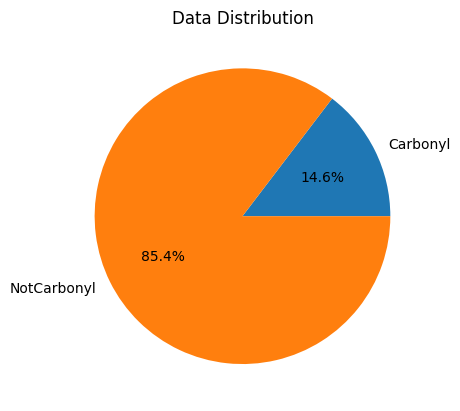

In [49]:
# Obtém o número total de moléculas nos dados de treinamento
total=len(Y)
# Determina quantos contêm uma carbonila
label1=Y.sum()
# Encontra o número sem carbonila por subtração
label0=total-label1
# Plota os dados
data=[label1,label0]
my_labels = 'Carbonyl', 'NotCarbonyl'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()



Moléculas sem carbonila dominam o conjunto de treinamento, de modo que as classes são desequilibradas.

***SMOTE (técnica de super-amostragem de minoria sintética)***

Dados de treinamento desequilibrados às vezes podem levar a um desempenho de classificação ruim porque o modelo pode simplesmente aprender a ignorar a classe menos comum ("minoritária").

Um método popular para tratar dados desbalanceados é a super-amostragem. Realizar uma super-amostragem significa criar artificialmente novas observações em nosso conjunto de dados que pertençam à classe que está sub-representada.

Uma técnica comumente utilizada se chama SMOTE — Synthetic Minority Over-sampling Technique (Técnica de Super-Amostragem Sintética da Minoria). Resumidamente, a SMOTE cria observações sintéticas da classe minoritária. Em outras palavras, gera novas instâncias da classe minoritária por interpolação entre as instâncias existentes.

*Observe que, se as duas classes forem suficientemente distintas, como é o caso aqui, uma etapa de balanceamento de dados pode não ser necessária - mas faremos isso de qualquer maneira.)

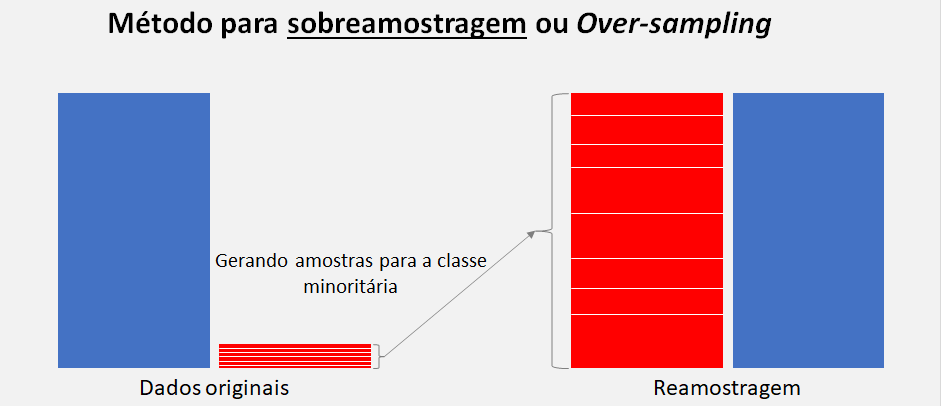

Envolve a duplicação de exemplos na classe minoritária, embora esses exemplos não adicionem nenhuma informação nova ao modelo, esses novos exemplos podem ser sintetizados a partir dos exemplos existentes.

In [50]:
%%capture
# Define o método SMOTE
sm = SMOTE(sampling_strategy='minority')
# Aplica SMOTE aos dados de treinamento
X, Y = sm.fit_resample(X,Y)

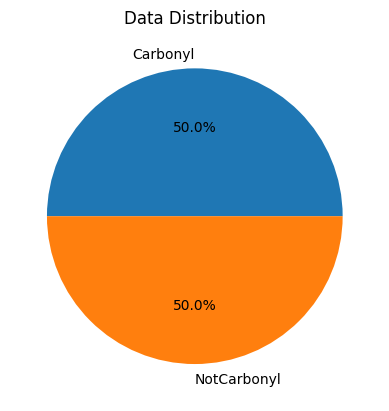

In [51]:
# Obtém o número total de moléculas nos dados de treinamento
total=len(Y)
# Determina quantos contêm uma carbonila
label1=Y.sum()
# Encontra o número sem carbonila por subtração
label0=total-label1
# Plota os dados
data=[label1,label0]
my_labels = 'Carbonyl', 'NotCarbonyl'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

In [52]:
%%capture
# Define o método SMOTE
sm = SMOTE(sampling_strategy='minority')
# Aplica SMOTE aos dados de treinamento
X_1, Y_1 = sm.fit_resample(X_1,Y_1)

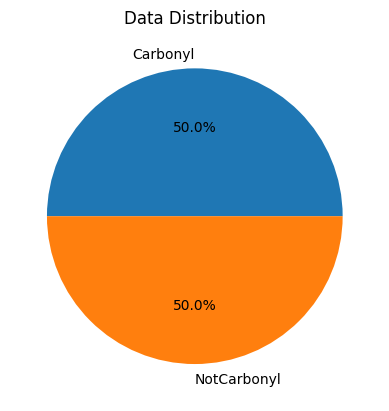

In [53]:
# Obtém o número total de moléculas nos dados de treinamento
total=len(Y_1)
# Determina quantos contêm uma carbonila
label1=Y_1.sum()
# Encontra o número sem carbonila por subtração
label0=total-label1
# Plota os dados
data=[label1,label0]
my_labels = 'Carbonyl', 'NotCarbonyl'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

Agora, os dados de treinamento estão balanceados entre as duas classes. Podemos, então, traçar um dos novos espectros contendo carbonila sintética para comparação com um espectro contendo carbonila real. (O espectro sintético variará cada vez que você executar o SMOTE.) Observe que os espectros sintéticos são armazenados no final da variável X, portanto, qualquer valor de índice maior que o comprimento original da variável de treinamento corresponde a um espectro sintético.
Abaixo podemos observar graficamente os espectros das moléculas reais e as sintéticas que foram criadas para igualar a quantidade de dados.

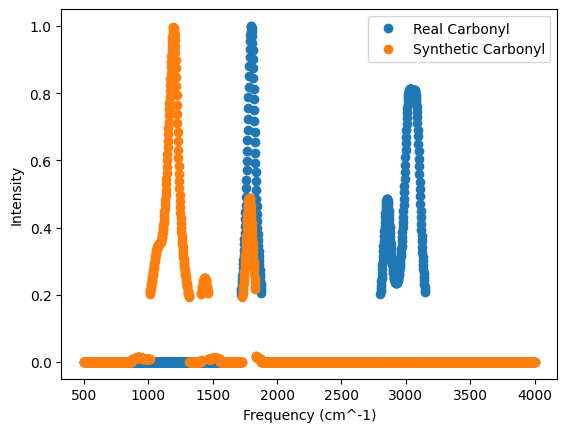

In [54]:
# Valores de índice de uma carbonila real e sintética (você pode alterar esses valores para ver outros espectros)
idx_realCarbonyl=1 # seleciona a molécula na linha 1 dos dados de treinamento (hexanal)
idx_synCarbonyl=len(train) # isso seleciona o primeiro espectro de carbonila sintética
# Obtém os dados das duas moléculas
spectrum_realCarbonyl=X[idx_realCarbonyl,:]
spectrum_synCarbonyl=X[idx_synCarbonyl,:]
# Obtém as frequências para plotagem
frequencies=range(500,4002,2)
# Gera o gráfico
plt.plot(frequencies, spectrum_realCarbonyl, "o", label="Real Carbonyl")
plt.plot(frequencies, spectrum_synCarbonyl, "o", label="Synthetic Carbonyl")
plt.legend(loc="upper right")
plt.xlabel("Frequency (cm^-1)")
plt.ylabel("Intensity")
plt.show()

In [55]:
%%capture
# Define o método SMOTE
sm = SMOTE(sampling_strategy='minority')
# Aplica SMOTE aos dados de treinamento para drop
X_drop1, Y_drop1 = sm.fit_resample(X_drop1,Y_drop1)
X_drop2, Y_drop2 = sm.fit_resample(X_drop2,Y_drop2)
X_drop3, Y_drop3 = sm.fit_resample(X_drop3,Y_drop3)
X_drop4, Y_drop4 = sm.fit_resample(X_drop4,Y_drop4)
X_drop5, Y_drop5 = sm.fit_resample(X_drop5,Y_drop5)

# **Construindo modelos de aprendizado de máquina**

Agora que o pré-processamento de dados está concluído, estamos finalmente prontos para construir nossos modelos de aprendizado de máquina! Inicialmente usaremos o modelo de classificadores Decision Tree Model implementados na biblioteca scikit-learn.

**Treinando o Modelo de Árvore de Decisão**

In [56]:
# Usar o algoritmo da árvore de decisão com os parâmetros padrão
dt_clf=DecisionTreeClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_clf.fit(X,Y)

DecisionTreeClassifier()

**Testando modelos de aprendizado de máquina**

Agora que treinamos nossos modelos de aprendizado de máquina, podemos usá-los em dados de teste. Existem algumas etapas nesse processo:

* Previsão de rótulos:

Usaremos os modelos de aprendizado de máquina ajustados para prever os rótulos (com ou sem carbonil) para o conjunto de dados de teste. Armazenaremos as previsões feitas pelos modelos ajustados na lista `Y_pred`.

* Avaliação do modelo:

É importante ver o desempenho dos modelos. Existem algumas maneiras de avaliar a precisão de um modelo de aprendizado de máquina:

a) Precisão : a proporção do número total de previsões que estavam corretas;

b) Sensibilidade ou Recall: a proporção de casos positivos reais (aqui, moléculas com uma carbonila) que são corretamente identificados;

c) Especificidade: a proporção de casos negativos reais (aqui, moléculas sem carbonila) que são identificados corretamente.


* Grupo Falso Negativo e Falso Positivo

Por fim, podemos analisar os casos de erro, onde a previsão do modelo estava errada.

Um falso positivo (FP) é um resultado em que o modelo prevê incorretamente a classe positiva.

Um falso negativo (FN) é um resultado em que o modelo prevê incorretamente a classe negativa.

Às vezes, podemos entender por que a previsão estava incorreta para uma determinada molécula, olhando a estrutura da molécula (Usaremos o módulo RDkit para esta tarefa) e o espectro molecular.

**Testando o modelo de árvore de decisão**

Agora vamos usar o modelo de Árvore de Decisão ajustado para previsão de rótulo. Em seguida, analisaremos o desempenho exibindo a precisão, sensibilidade e especificidade.

In [57]:
# Use o modelo de Árvore de Decisão ajustado para prever os rótulos (com ou sem carbonil) para o conjunto de dados de teste
Y_pred=dt_clf.predict(X_test)

In [58]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy=np.round(accuracy_score(Y_test,Y_pred),2)
dt_sensitivity=np.round(recall_score(Y_test,Y_pred),2)
dt_specificity=np.round(recall_score(Y_test,Y_pred,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy)+" Sensitivity: "+str(dt_sensitivity)+" Specificity: "+str(dt_specificity))

Accuracy: 0.96 Sensitivity: 0.88 Specificity: 0.98


**Treinando o modelo Random Florest**

In [59]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf.fit(X,Y)

RandomForestClassifier()

*Treinando o modelo Random Florest para thresholding igual a 0.5*

In [60]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_1 = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_1.fit(X_1,Y_1)

RandomForestClassifier()

*Treinando o modelo Random Florest para dados não balanceados (Sem SMOTE)*

In [61]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_2 = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_2.fit(X_2,Y_2)

RandomForestClassifier()

*Treinando o modelo Random Florest para drop dos dados de treinamento*

In [62]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_drop1 = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_drop1.fit(X_drop1,Y_drop1)

RandomForestClassifier()

In [63]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_drop2 = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_drop2.fit(X_drop2,Y_drop2)

RandomForestClassifier()

In [64]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_drop3 = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_drop3.fit(X_drop3,Y_drop3)

RandomForestClassifier()

In [65]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_drop4 = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_drop4.fit(X_drop4,Y_drop4)

RandomForestClassifier()

In [66]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_drop5 = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_drop5.fit(X_drop5,Y_drop5)

RandomForestClassifier()

**Testando o modelo Random Florest**

In [67]:
Y_pred_rf = dt_rf.predict(X_test)

In [68]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf=np.round(accuracy_score(Y_test,Y_pred_rf),2)
dt_sensitivity_rf=np.round(recall_score(Y_test,Y_pred_rf),2)
dt_specificity_rf=np.round(recall_score(Y_test,Y_pred_rf,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf)+" Sensitivity: "+str(dt_sensitivity_rf)+" Specificity: "+str(dt_specificity_rf))

Accuracy: 0.98 Sensitivity: 1.0 Specificity: 0.98


*Testando o modelo Random Florest para thresholding igual a 0.5*

In [69]:
Y_pred_rf_1 = dt_rf_1.predict(X_test_1)

In [70]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_1=np.round(accuracy_score(Y_test_1,Y_pred_rf_1),2)
dt_sensitivity_rf_1=np.round(recall_score(Y_test_1,Y_pred_rf_1),2)
dt_specificity_rf_1=np.round(recall_score(Y_test_1,Y_pred_rf_1,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_1)+" Sensitivity: "+str(dt_sensitivity_rf_1)+" Specificity: "+str(dt_specificity_rf_1))

Accuracy: 0.97 Sensitivity: 0.93 Specificity: 0.97


*Testando o modelo Random Florest para os dados de teste "ruim"*

In [71]:
Y_pred_rf_bad = dt_rf.predict(X_test_bad)

In [72]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_bad=np.round(accuracy_score(Y_test_bad,Y_pred_rf_bad),2)
dt_sensitivity_rf_bad=np.round(recall_score(Y_test_bad,Y_pred_rf_bad),2)
dt_specificity_rf_bad=np.round(recall_score(Y_test_bad,Y_pred_rf_bad,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_bad)+" Sensitivity: "+str(dt_sensitivity_rf_bad)+" Specificity: "+str(dt_specificity_rf_bad))

Accuracy: 0.25 Sensitivity: 0.25 Specificity: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



*Testando o modelo Random Florest para dados não balanceados (Sem SMOTE)*

In [73]:
Y_pred_rf_2 = dt_rf_2.predict(X_test_2)

In [74]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_2=np.round(accuracy_score(Y_test_2,Y_pred_rf_2),2)
dt_sensitivity_rf_2=np.round(recall_score(Y_test_2,Y_pred_rf_2),2)
dt_specificity_rf_2=np.round(recall_score(Y_test_2,Y_pred_rf_2,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_2)+" Sensitivity: "+str(dt_sensitivity_rf_2)+" Specificity: "+str(dt_specificity_rf_2))

Accuracy: 0.98 Sensitivity: 1.0 Specificity: 0.98


*Testando o modelo Random Florest para dados de treinamento com drop*

In [75]:
Y_pred_rf_drop1 = dt_rf_drop1.predict(X_test)
Y_pred_rf_drop2 = dt_rf_drop2.predict(X_test)
Y_pred_rf_drop3 = dt_rf_drop3.predict(X_test)
Y_pred_rf_drop4 = dt_rf_drop4.predict(X_test)
Y_pred_rf_drop5 = dt_rf_drop5.predict(X_test)

In [76]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_drop1=np.round(accuracy_score(Y_test,Y_pred_rf_drop1),2)
dt_sensitivity_rf_drop1=np.round(recall_score(Y_test,Y_pred_rf_drop1),2)
dt_specificity_rf_drop1=np.round(recall_score(Y_test,Y_pred_rf_drop1,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_drop1)+" Sensitivity: "+str(dt_sensitivity_rf_drop1)+" Specificity: "+str(dt_specificity_rf_drop1))

Accuracy: 0.98 Sensitivity: 0.98 Specificity: 0.98


In [77]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_drop2=np.round(accuracy_score(Y_test,Y_pred_rf_drop2),2)
dt_sensitivity_rf_drop2=np.round(recall_score(Y_test,Y_pred_rf_drop2),2)
dt_specificity_rf_drop2=np.round(recall_score(Y_test,Y_pred_rf_drop2,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_drop2)+" Sensitivity: "+str(dt_sensitivity_rf_drop2)+" Specificity: "+str(dt_specificity_rf_drop2))

Accuracy: 0.98 Sensitivity: 1.0 Specificity: 0.98


In [78]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_drop3=np.round(accuracy_score(Y_test,Y_pred_rf_drop3),2)
dt_sensitivity_rf_drop3=np.round(recall_score(Y_test,Y_pred_rf_drop3),2)
dt_specificity_rf_drop3=np.round(recall_score(Y_test,Y_pred_rf_drop3,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_drop3)+" Sensitivity: "+str(dt_sensitivity_rf_drop3)+" Specificity: "+str(dt_specificity_rf_drop3))

Accuracy: 0.98 Sensitivity: 1.0 Specificity: 0.98


In [79]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_drop4=np.round(accuracy_score(Y_test,Y_pred_rf_drop4),2)
dt_sensitivity_rf_drop4=np.round(recall_score(Y_test,Y_pred_rf_drop4),2)
dt_specificity_rf_drop4=np.round(recall_score(Y_test,Y_pred_rf_drop4,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_drop4)+" Sensitivity: "+str(dt_sensitivity_rf_drop4)+" Specificity: "+str(dt_specificity_rf_drop4))

Accuracy: 0.98 Sensitivity: 1.0 Specificity: 0.98


In [80]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_drop5=np.round(accuracy_score(Y_test,Y_pred_rf_drop5),2)
dt_sensitivity_rf_drop5=np.round(recall_score(Y_test,Y_pred_rf_drop5),2)
dt_specificity_rf_drop5=np.round(recall_score(Y_test,Y_pred_rf_drop5,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_drop5)+" Sensitivity: "+str(dt_sensitivity_rf_drop5)+" Specificity: "+str(dt_specificity_rf_drop5))

Accuracy: 0.98 Sensitivity: 1.0 Specificity: 0.98


**Treinando o modelo de K-Neighbors**

In [81]:
# Usar o algoritmo K-neighbors com os parâmetros padrão
dt_kn = KNeighborsClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_kn.fit(X,Y)

KNeighborsClassifier()

In [82]:
# Usar o algoritmo K-neighbors com n = 10
dt_kn_1 = KNeighborsClassifier(n_neighbors=10)
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_kn_1.fit(X,Y)

KNeighborsClassifier(n_neighbors=10)

In [83]:
# Usar o algoritmo K-neighbors com n = 50
dt_kn_2 = KNeighborsClassifier(n_neighbors=50)
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_kn_2.fit(X,Y)

KNeighborsClassifier(n_neighbors=50)

In [84]:
# Usar o algoritmo K-neighbors com n = 100
dt_kn_3 = KNeighborsClassifier(n_neighbors=100)
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_kn_3.fit(X,Y)

KNeighborsClassifier(n_neighbors=100)

In [85]:
# Usar o algoritmo K-neighbors com n = 150
dt_kn_4 = KNeighborsClassifier(n_neighbors=150)
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_kn_4.fit(X,Y)

KNeighborsClassifier(n_neighbors=150)

**Testando o modelo K-Neighbors**

In [86]:
Y_pred_kn = dt_kn.predict(X_test)

In [87]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_kn=np.round(accuracy_score(Y_test,Y_pred_kn),2)
dt_sensitivity_kn=np.round(recall_score(Y_test,Y_pred_kn),2)
dt_specificity_kn=np.round(recall_score(Y_test,Y_pred_kn,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_kn)+" Sensitivity: "+str(dt_sensitivity_kn)+" Specificity: "+str(dt_specificity_kn))

Accuracy: 0.96 Sensitivity: 1.0 Specificity: 0.95


*Testando o modelo K-Neighbors com n = 10*

In [88]:
Y_pred_kn_1 = dt_kn_1.predict(X_test)

In [89]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_kn_1=np.round(accuracy_score(Y_test,Y_pred_kn_1),2)
dt_sensitivity_kn_1=np.round(recall_score(Y_test,Y_pred_kn_1),2)
dt_specificity_kn_1=np.round(recall_score(Y_test,Y_pred_kn_1,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_kn_1)+" Sensitivity: "+str(dt_sensitivity_kn_1)+" Specificity: "+str(dt_specificity_kn_1))

Accuracy: 0.97 Sensitivity: 1.0 Specificity: 0.97


*Testando o modelo K-Neighbors com n = 50*

In [90]:
Y_pred_kn_2 = dt_kn_2.predict(X_test)

In [91]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_kn_2=np.round(accuracy_score(Y_test,Y_pred_kn_2),2)
dt_sensitivity_kn_2=np.round(recall_score(Y_test,Y_pred_kn_2),2)
dt_specificity_kn_2=np.round(recall_score(Y_test,Y_pred_kn_2,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_kn_2)+" Sensitivity: "+str(dt_sensitivity_kn_2)+" Specificity: "+str(dt_specificity_kn_2))

Accuracy: 0.95 Sensitivity: 1.0 Specificity: 0.94


*Testando o modelo K-Neighbors com n = 100*

In [92]:
Y_pred_kn_3 = dt_kn_3.predict(X_test)

In [93]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_kn_3=np.round(accuracy_score(Y_test,Y_pred_kn_3),2)
dt_sensitivity_kn_3=np.round(recall_score(Y_test,Y_pred_kn_3),2)
dt_specificity_kn_3=np.round(recall_score(Y_test,Y_pred_kn_3,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_kn_3)+" Sensitivity: "+str(dt_sensitivity_kn_3)+" Specificity: "+str(dt_specificity_kn_3))

Accuracy: 0.93 Sensitivity: 1.0 Specificity: 0.92


*Testando o modelo K-Neighbors com n = 150*

In [94]:
Y_pred_kn_4 = dt_kn_4.predict(X_test)

In [95]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_kn_4=np.round(accuracy_score(Y_test,Y_pred_kn_4),2)
dt_sensitivity_kn_4=np.round(recall_score(Y_test,Y_pred_kn_4),2)
dt_specificity_kn_4=np.round(recall_score(Y_test,Y_pred_kn_4,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_kn_4)+" Sensitivity: "+str(dt_sensitivity_kn_4)+" Specificity: "+str(dt_specificity_kn_4))

Accuracy: 0.92 Sensitivity: 1.0 Specificity: 0.9


**Treinando o modelo de GaussianNB**

In [96]:
# Usar o algoritmo GaussianNB com os parâmetros padrão
dt_nb = GaussianNB()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_nb.fit(X,Y)

GaussianNB()

In [97]:
# Usar o algoritmo GaussianNB com var_smoothing = 1e-07
dt_nb_1 = GaussianNB(var_smoothing = 1e-07)
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_nb_1.fit(X,Y)

GaussianNB(var_smoothing=1e-07)

In [98]:
# Usar o algoritmo GaussianNB com var_smoothing = 1e-04
dt_nb_2 = GaussianNB(var_smoothing = 1e-04)
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_nb_2.fit(X,Y)

GaussianNB(var_smoothing=0.0001)

In [99]:
# Usar o algoritmo GaussianNB com var_smoothing = 1e-01
dt_nb_3 = GaussianNB(var_smoothing = 1e-01)
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_nb_3.fit(X,Y)

GaussianNB(var_smoothing=0.1)

In [100]:
# Usar o algoritmo GaussianNB com var_smoothing = 1
dt_nb_4 = GaussianNB(var_smoothing = 1)
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_nb_4.fit(X,Y)

GaussianNB(var_smoothing=1)

**Testando o modelo de GaussianNB**

In [101]:
Y_pred_nb = dt_nb.predict(X_test)

In [102]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_nb=np.round(accuracy_score(Y_test,Y_pred_nb),2)
dt_sensitivity_nb=np.round(recall_score(Y_test,Y_pred_nb),2)
dt_specificity_nb=np.round(recall_score(Y_test,Y_pred_nb,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_nb)+" Sensitivity: "+str(dt_sensitivity_nb)+" Specificity: "+str(dt_specificity_nb))

Accuracy: 0.42 Sensitivity: 1.0 Specificity: 0.29


*Testando o modelo de GaussianNB com var_smoothing = 1e-07*

In [103]:
Y_pred_nb_1 = dt_nb_1.predict(X_test)

In [104]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_nb_1=np.round(accuracy_score(Y_test,Y_pred_nb_1),2)
dt_sensitivity_nb_1=np.round(recall_score(Y_test,Y_pred_nb_1),2)
dt_specificity_nb_1=np.round(recall_score(Y_test,Y_pred_nb_1,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_nb_1)+" Sensitivity: "+str(dt_sensitivity_nb_1)+" Specificity: "+str(dt_specificity_nb_1))

Accuracy: 0.47 Sensitivity: 1.0 Specificity: 0.35


*Testando o modelo de GaussianNB com var_smoothing = 1e-04*

In [105]:
Y_pred_nb_2 = dt_nb_2.predict(X_test)

In [106]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_nb_2=np.round(accuracy_score(Y_test,Y_pred_nb_2),2)
dt_sensitivity_nb_2=np.round(recall_score(Y_test,Y_pred_nb_2),2)
dt_specificity_nb_2=np.round(recall_score(Y_test,Y_pred_nb_2,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_nb_2)+" Sensitivity: "+str(dt_sensitivity_nb_2)+" Specificity: "+str(dt_specificity_nb_2))

Accuracy: 0.54 Sensitivity: 1.0 Specificity: 0.43


*Testando o modelo de GaussianNB com var_smoothing = 1e-01*

In [107]:
Y_pred_nb_3 = dt_nb_3.predict(X_test)

In [108]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_nb_3=np.round(accuracy_score(Y_test,Y_pred_nb_3),2)
dt_sensitivity_nb_3=np.round(recall_score(Y_test,Y_pred_nb_3),2)
dt_specificity_nb_3=np.round(recall_score(Y_test,Y_pred_nb_3,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_nb_3)+" Sensitivity: "+str(dt_sensitivity_nb_3)+" Specificity: "+str(dt_specificity_nb_3))

Accuracy: 0.89 Sensitivity: 1.0 Specificity: 0.87


*Testando o modelo de GaussianNB com var_smoothing = 1*

In [109]:
Y_pred_nb_4 = dt_nb_4.predict(X_test)

In [110]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_nb_4=np.round(accuracy_score(Y_test,Y_pred_nb_4),2)
dt_sensitivity_nb_4=np.round(recall_score(Y_test,Y_pred_nb_4),2)
dt_specificity_nb_4=np.round(recall_score(Y_test,Y_pred_nb_4,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_nb_4)+" Sensitivity: "+str(dt_sensitivity_nb_4)+" Specificity: "+str(dt_specificity_nb_4))

Accuracy: 0.82 Sensitivity: 1.0 Specificity: 0.77


**Análise dos Grupos FP / FN**

Agora vamos olhar com mais cuidado para os FPs e FNs. Primeiro, precisamos determinar quais previsões estavam incorretas e separá-las nos dois tipos de erros.


In [111]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp=[]
fn=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred[i] != Y_test[i] and Y_test[i] ==0:
       fp.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred[i] != Y_test[i] and Y_test[i]==1:
       fn.append(i)

**Identificando FP e FN para o Random Florest**

In [112]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_rf=[]
fn_rf=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_rf[i] != Y_test[i] and Y_test[i] ==0:
       fp_rf.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_rf[i] != Y_test[i] and Y_test[i]==1:
       fn_rf.append(i)

In [113]:
len(fp_rf)

4

In [114]:
len(fn_rf)

0

In [115]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_rf_1=[]
fn_rf_1=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test_1)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_rf_1[i] != Y_test_1[i] and Y_test_1[i] ==0:
       fp_rf_1.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_rf_1[i] != Y_test_1[i] and Y_test_1[i]==1:
       fn_rf_1.append(i)

In [116]:
len(fp_rf_1)

5

In [117]:
len(fn_rf_1)

3

**Identificando os FP e FN para o K-neighbors com n = 5 (padrão)**

In [118]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_kn=[]
fn_kn=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_kn[i] != Y_test[i] and Y_test[i] ==0:
       fp_kn.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_kn[i] != Y_test[i] and Y_test[i]==1:
       fn_kn.append(i)

In [119]:
len(fp_kn)

9

In [120]:
len(fn_kn)

0

*Identificando FP e FN para K-Neighbors com n = 10*

In [121]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_kn_1=[]
fn_kn_1=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_kn_1[i] != Y_test[i] and Y_test[i] ==0:
       fp_kn_1.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_kn_1[i] != Y_test[i] and Y_test[i]==1:
       fn_kn_1.append(i)

In [122]:
len(fp_kn_1)

6

In [123]:
len(fn_kn_1)

0

*Identificando FP e FN para K-Neighbors com n = 50*

In [124]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_kn_2=[]
fn_kn_2=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_kn_2[i] != Y_test[i] and Y_test[i] ==0:
       fp_kn_2.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_kn_2[i] != Y_test[i] and Y_test[i]==1:
       fn_kn_2.append(i)

In [125]:
len(fp_kn_2)

12

In [126]:
len(fn_kn_2)

0

*Identificando FP e FN para K-Neighbors com n = 100*

In [127]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_kn_3=[]
fn_kn_3=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_kn_3[i] != Y_test[i] and Y_test[i] ==0:
       fp_kn_3.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_kn_3[i] != Y_test[i] and Y_test[i]==1:
       fn_kn_3.append(i)

In [128]:
len(fp_kn_3)

16

In [129]:
len(fn_kn_3)

0

*Identificando FP e FN para K-Neighbors com n = 150*

In [130]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_kn_4=[]
fn_kn_4=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_kn_4[i] != Y_test[i] and Y_test[i] ==0:
       fp_kn_4.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_kn_4[i] != Y_test[i] and Y_test[i]==1:
       fn_kn_4.append(i)

In [131]:
len(fp_kn_4)

19

In [132]:
len(fn_kn_4)

0

**Identificando FP e FN para GaussianNB**

In [133]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_nb=[]
fn_nb=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_nb[i] != Y_test[i] and Y_test[i] ==0:
       fp_nb.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_nb[i] != Y_test[i] and Y_test[i]==1:
       fn_nb.append(i)

In [134]:
len(fp_nb)

134

In [135]:
len(fn_nb)

0

*Identificando FP e FN para GaussianNB com var_smoothing = 1e-07*

In [136]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_nb_1=[]
fn_nb_1=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_nb_1[i] != Y_test[i] and Y_test[i] ==0:
       fp_nb_1.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_nb_1[i] != Y_test[i] and Y_test[i]==1:
       fn_nb_1.append(i)

In [137]:
len(fp_nb_1)

124

In [138]:
len(fn_nb_1)

0

*Identificando FP e FN para GaussianNB com var_smoothing = 1e-04*

In [139]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_nb_2=[]
fn_nb_2=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_nb_2[i] != Y_test[i] and Y_test[i] ==0:
       fp_nb_2.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_nb_2[i] != Y_test[i] and Y_test[i]==1:
       fn_nb_2.append(i)

*Identificando FP e FN para GaussianNB com var_smoothing = 1e-01*

In [140]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_nb_3=[]
fn_nb_3=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_nb_3[i] != Y_test[i] and Y_test[i] ==0:
       fp_nb_3.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_nb_3[i] != Y_test[i] and Y_test[i]==1:
       fn_nb_3.append(i)

In [141]:
len(fp_nb_3)

25

In [142]:
len(fn_nb_3)

0

*Identificando FP e FN para GaussianNB com var_smoothing = 1*

In [143]:
# Crie novas variáveis para manter os índices (ou seja, número da linha) de todos os FPs e FNs
fp_nb_4=[]
fn_nb_4=[]

# Passar por todas as previsões para identificar os erros e, em seguida, determinar se cada um é um FP ou FN
for i in range (len(Y_test)):
  # Identificar FPs e armazenar seus índices
  if Y_pred_nb_4[i] != Y_test[i] and Y_test[i] ==0:
       fp_nb_4.append(i)
  # Identificar FNs e armazenar seus índices
  elif Y_pred_nb_4[i] != Y_test[i] and Y_test[i]==1:
       fn_nb_4.append(i)

In [144]:
len(fp_nb_4)

43

In [145]:
len(fn_nb_4)

0

**Utilizando o RDkit para obter a estrutura da molécula**

Podemos usar a biblioteca RDkit para exibir a estrutura de uma molécula. Para identificar a molécula, usamos o Sistema de Entrada de Linha de Entrada Molecular Simplificado, ou SMILES. SMILES é um identificador químico exclusivo na forma de uma string ASCII. Primeiro vamos percorrer as listas de FPs e FNs para obter as strings SMILES e os nomes das moléculas.

In [146]:
# Obter as strings SMILES para a Árvore de decisão
fpmols=test.iloc[fp,0].values
# Obter o nome da molécula
fpmols_name=test.iloc[fp,1].values

# Obter as strings SMILES
fnmols=test.iloc[fn,0].values
# Oobter o nome da molécula
fnmols_name=test.iloc[fn,1].values

# Obter listas das strings FP e FN SMILES
fp_list = [Chem.MolFromSmiles(smiles) for smiles in fpmols]
fn_list = [Chem.MolFromSmiles(smiles) for smiles in fnmols]

In [147]:
# Obter as strings SMILES para a Random Florest
fpmols_rf=test.iloc[fp_rf,0].values
# Obter o nome da molécula
fpmols_name_rf=test.iloc[fp_rf,1].values

# Obter as strings SMILES
fnmols_rf=test.iloc[fn_rf,0].values
# Obter o nome da molécula
fnmols_name_rf=test.iloc[fn_rf,1].values

# Obter listas das strings FP e FN SMILES
fp_list_rf = [Chem.MolFromSmiles(smiles) for smiles in fpmols_rf]
fn_list_rf = [Chem.MolFromSmiles(smiles) for smiles in fnmols_rf]

In [148]:
# Obter as strings SMILES para K-Neighbors
fpmols_kn=test.iloc[fp_kn,0].values
# Obter o nome da molécula
fpmols_name_kn=test.iloc[fp_kn,1].values

# Obter as strings SMILES
fnmols_kn=test.iloc[fn_kn,0].values
# Obter o nome da molécula
fnmols_name_kn=test.iloc[fn_kn,1].values

# Obter listas das strings FP e FN SMILES
fp_list_kn = [Chem.MolFromSmiles(smiles) for smiles in fpmols_kn]
fn_list_kn = [Chem.MolFromSmiles(smiles) for smiles in fnmols_kn]

In [149]:
# Obter as strings SMILES para K-Neighbors com n = 10
fpmols_kn_1=test.iloc[fp_kn_1,0].values
# Obter o nome da molécula
fpmols_name_kn_1=test.iloc[fp_kn_1,1].values

# Obter as strings SMILES
fnmols_kn_1=test.iloc[fn_kn_1,0].values
# Obter o nome da molécula
fnmols_name_kn_1=test.iloc[fn_kn_1,1].values

# Obter listas das strings FP e FN SMILES
fp_list_kn_1 = [Chem.MolFromSmiles(smiles) for smiles in fpmols_kn_1]
fn_list_kn_1 = [Chem.MolFromSmiles(smiles) for smiles in fnmols_kn_1]

In [150]:
# Oter as strings SMILES para K-Neighbors com n = 50
fpmols_kn_2=test.iloc[fp_kn_2,0].values
# Obter o nome da molécula
fpmols_name_kn_2=test.iloc[fp_kn_2,1].values

# Obter as strings SMILES
fnmols_kn_2=test.iloc[fn_kn_2,0].values
# Obter o nome da molécula
fnmols_name_kn_2=test.iloc[fn_kn_2,1].values

# Obter listas das strings FP e FN SMILES
fp_list_kn_2 = [Chem.MolFromSmiles(smiles) for smiles in fpmols_kn_2]
fn_list_kn_2 = [Chem.MolFromSmiles(smiles) for smiles in fnmols_kn_2]

In [151]:
# Obter as strings SMILES para K-Neighbors com n = 100
fpmols_kn_3=test.iloc[fp_kn_3,0].values
# Obter o nome da molécula
fpmols_name_kn_3=test.iloc[fp_kn_3,1].values

# Obter as strings SMILES
fnmols_kn_3=test.iloc[fn_kn_3,0].values
# Obter o nome da molécula
fnmols_name_kn_3=test.iloc[fn_kn_3,1].values

# Obter listas das strings FP e FN SMILES
fp_list_kn_3 = [Chem.MolFromSmiles(smiles) for smiles in fpmols_kn_3]
fn_list_kn_3 = [Chem.MolFromSmiles(smiles) for smiles in fnmols_kn_3]

In [152]:
# Obter as strings SMILES para K-Neighbors com n = 150
fpmols_kn_4=test.iloc[fp_kn_4,0].values
# Obter o nome da molécula
fpmols_name_kn_4=test.iloc[fp_kn_4,1].values

# Obter as strings SMILES
fnmols_kn_4=test.iloc[fn_kn_4,0].values
# Obter o nome da molécula
fnmols_name_kn_4=test.iloc[fn_kn_4,1].values

# Obter listas das strings FP e FN SMILES
fp_list_kn_4 = [Chem.MolFromSmiles(smiles) for smiles in fpmols_kn_4]
fn_list_kn_4 = [Chem.MolFromSmiles(smiles) for smiles in fnmols_kn_4]

In [153]:
# Obter as strings SMILES para GaussianNB
fpmols_nb=test.iloc[fp_nb,0].values
# Obter o nome da molécula
fpmols_name_nb=test.iloc[fp_nb,1].values

# Obter as strings SMILES
fnmols_nb=test.iloc[fn_nb,0].values
# Obter o nome da molécula
fnmols_name_nb=test.iloc[fn_nb,1].values

# Obter listas das strings FP e FN SMILES
fp_list_nb = [Chem.MolFromSmiles(smiles) for smiles in fpmols_nb]
fn_list_nb = [Chem.MolFromSmiles(smiles) for smiles in fnmols_nb]

[16:32:05] Explicit valence for atom # 1 N, 4, is greater than permitted


In [154]:
# Obter as strings SMILES para GaussianNB com var_smoothing = 1e-07
fpmols_nb_1=test.iloc[fp_nb_1,0].values
# Obter o nome da molécula
fpmols_name_nb_1=test.iloc[fp_nb_1,1].values

# Obter as strings SMILES
fnmols_nb_1=test.iloc[fn_nb_1,0].values
# Obter o nome da molécula
fnmols_name_nb_1=test.iloc[fn_nb_1,1].values

# Obter listas das strings FP e FN SMILES
fp_list_nb_1 = [Chem.MolFromSmiles(smiles) for smiles in fpmols_nb_1]
fn_list_nb_1 = [Chem.MolFromSmiles(smiles) for smiles in fnmols_nb_1]

[16:32:12] Explicit valence for atom # 1 N, 4, is greater than permitted


In [155]:
# Obter as strings SMILES para GaussianNB com var_smoothing = 1e-04
fpmols_nb_2=test.iloc[fp_nb_2,0].values
# Obter o nome da molécula
fpmols_name_nb_2=test.iloc[fp_nb_2,1].values

# Obter as strings SMILES
fnmols_nb_2=test.iloc[fn_nb_2,0].values
# Obter o nome da molécula
fnmols_name_nb_2=test.iloc[fn_nb_2,1].values

# Obter listas das strings FP e FN SMILES
fp_list_nb_2 = [Chem.MolFromSmiles(smiles) for smiles in fpmols_nb_2]
fn_list_nb_2 = [Chem.MolFromSmiles(smiles) for smiles in fnmols_nb_2]

[16:32:15] Explicit valence for atom # 1 N, 4, is greater than permitted


In [156]:
# Obter as strings SMILES para GaussianNB com var_smoothing = 1e-01
fpmols_nb_3=test.iloc[fp_nb_3,0].values
# Obter o nome da molécula
fpmols_name_nb_3=test.iloc[fp_nb_3,1].values

# Obter as strings SMILES
fnmols_nb_3=test.iloc[fn_nb_3,0].values
# Obter o nome da molécula
fnmols_name_nb_3=test.iloc[fn_nb_3,1].values

# Obter listas das strings FP e FN SMILES
fp_list_nb_3 = [Chem.MolFromSmiles(smiles) for smiles in fpmols_nb_3]
fn_list_nb_3 = [Chem.MolFromSmiles(smiles) for smiles in fnmols_nb_3]

In [157]:
# Obter as strings SMILES para GaussianNB com var_smoothing = 1
fpmols_nb_4=test.iloc[fp_nb_4,0].values
# Obter o nome da molécula
fpmols_name_nb_4=test.iloc[fp_nb_4,1].values

# Obter as strings SMILES
fnmols_nb_4=test.iloc[fn_nb_4,0].values
# Obter o nome da molécula
fnmols_name_nb_4=test.iloc[fn_nb_4,1].values

# Obter listas das strings FP e FN SMILES
fp_list_nb_4 = [Chem.MolFromSmiles(smiles) for smiles in fpmols_nb_4]
fn_list_nb_4 = [Chem.MolFromSmiles(smiles) for smiles in fnmols_nb_4]

[16:32:31] Explicit valence for atom # 2 N, 4, is greater than permitted
[16:32:31] Explicit valence for atom # 1 N, 4, is greater than permitted


In [158]:
# Define nomes de moléculas para o gráfico FP exibido abaixo
for i in range(len(fp_list)):
  mol=fp_list[i]
  mol.SetProp("_Name",fpmols_name[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list)):
  mol=fn_list[i]
  mol.SetProp("_Name",fnmols_name[i])

In [159]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para Random Florest
for i in range(len(fp_list_rf)):
  mol=fp_list_rf[i]
  mol.SetProp("_Name",fpmols_name_rf[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_rf)):
  mol=fn_list_rf[i]
  mol.SetProp("_Name",fnmols_name_rf[i])

In [160]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para K-neighbors
for i in range(len(fp_list_kn)):
  mol=fp_list_kn[i]
  mol.SetProp("_Name",fpmols_name_kn[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_kn)):
  mol=fn_list_kn[i]
  mol.SetProp("_Name",fnmols_name_kn[i])

In [161]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para K-neighbors com n = 10
for i in range(len(fp_list_kn_1)):
  mol=fp_list_kn_1[i]
  mol.SetProp("_Name",fpmols_name_kn_1[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_kn_1)):
  mol=fn_list_kn_1[i]
  mol.SetProp("_Name",fnmols_name_kn_1[i])

In [162]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para K-neighbors com n = 50
for i in range(len(fp_list_kn_2)):
  mol=fp_list_kn_2[i]
  mol.SetProp("_Name",fpmols_name_kn_2[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_kn_2)):
  mol=fn_list_kn_2[i]
  mol.SetProp("_Name",fnmols_name_kn_2[i])

In [163]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para K-neighbors com n = 100
for i in range(len(fp_list_kn_3)):
  mol=fp_list_kn_3[i]
  mol.SetProp("_Name",fpmols_name_kn_3[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_kn_3)):
  mol=fn_list_kn_3[i]
  mol.SetProp("_Name",fnmols_name_kn_3[i])

In [164]:
fp_list_nb.remove(None)

In [165]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para GaussianNB
for i in range(len(fp_list_nb)):
  mol=fp_list_nb[i]
  mol.SetProp("_Name",fpmols_name_nb[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_nb)):
  mol=fn_list_nb[i]
  mol.SetProp("_Name",fnmols_name_nb[i])

In [166]:
fp_list_nb_1.remove(None)

In [167]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para GaussianNB om var_smoothing = 1e-07
for i in range(len(fp_list_nb_1)):
  mol=fp_list_nb_1[i]
  mol.SetProp("_Name",fpmols_name_nb_1[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_nb_1)):
  mol=fn_list_nb_1[i]
  mol.SetProp("_Name",fnmols_name_nb_1[i])

In [168]:
fp_list_nb_2.remove(None)

In [169]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para GaussianNB com var_smoothing = 1e-04
for i in range(len(fp_list_nb_2)):
  mol=fp_list_nb_2[i]
  mol.SetProp("_Name",fpmols_name_nb_2[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_nb_2)):
  mol=fn_list_nb_2[i]
  mol.SetProp("_Name",fnmols_name_nb_2[i])

In [170]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para GaussianNB com var_smoothing = 1e-01
for i in range(len(fp_list_nb_3)):
  mol=fp_list_nb_3[i]
  mol.SetProp("_Name",fpmols_name_nb_3[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_nb_3)):
  mol=fn_list_nb_3[i]
  mol.SetProp("_Name",fnmols_name_nb_3[i])

In [171]:
fp_list_nb_4.remove(None)

In [175]:
# Define nomes de moléculas para o gráfico FP exibido abaixo para K-neighbors com n = 100
for i in range(len(fp_list_kn_4)):
  mol=fp_list_kn_4[i]
  mol.SetProp("_Name",fpmols_name_kn_4[i])

# Define nomes de moléculas para o gráfico FN exibido abaixo
for i in range(len(fn_list_kn_4)):
  mol=fn_list_kn_4[i]
  mol.SetProp("_Name",fnmols_name_kn_4[i])

In [176]:
len(fp)

4

Agora vamos exibir tabelas mostrando o índice, nome e string SMILES de quaisquer FPs e FNs. Observe que, se o desempenho do modelo for muito bom, pode não haver FPs e/ou FNs, portanto, a(s) tabela(s) estará(ão) vazia(s) nesse caso

In [177]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp, 0:2]

FP List


,SMILES,name
17,C=CF,fluoroethene
78,[O][N]O,nitrous-acid-trans
182,[CrH2],chromium-dihydride
217,FC#[As],fluoromethylidynearsine


In [178]:
len(fn)

5

In [179]:
# Exibir uma tabela mostrando o índice, a string SMILES e o nome de todos os FNs
print('\033[1m' + 'FN List' + '\033[0m')
test.iloc[fn, 0:2]

FN List


,SMILES,name
23,CC(C)=O,acetone
59,CCCC(=O)N(CC)CC,NN-diethylbutanamide
60,O=C(Cl)c1ccc(C(=O)Cl)cc1,terephthaloyl-chloride
183,Cc1ccccc1C=O,o-tolualdehyde
211,NC=O,formamide


In [180]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para Random Florest
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_rf, 0:2]

FP List


,SMILES,name
78,[O][N]O,nitrous-acid-trans
105,F[CrH],chromium-fluoride-hydride
169,N=C(F)F,carboimidic-difluoride
182,[CrH2],chromium-dihydride


In [181]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para K-neighbors
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_kn, 0:2]

FP List


,SMILES,name
85,CC(F)(F)F,111-trifluoroethane
86,CN1CCCN=C1C=Cc1cccs1,1-methyl-2-e-2-thiophen-2-ylethenyl-56-dihydro...
100,COC(F)(F)C(F)(F)F,pentafluoroethyl-methyl-ether
105,F[CrH],chromium-fluoride-hydride
122,FC(F)(F)C(F)(F)I,pentafluoroethyl-iodide
151,C1OCOCO1,135-trioxane
169,N=C(F)F,carboimidic-difluoride
182,[CrH2],chromium-dihydride
217,FC#[As],fluoromethylidynearsine


In [182]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para K-neighbors com n = 10
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_kn_1, 0:2]

FP List


,SMILES,name
80,FC(F)(F)C(F)(F)F,hexafluoroethane
86,CN1CCCN=C1C=Cc1cccs1,1-methyl-2-e-2-thiophen-2-ylethenyl-56-dihydro...
105,F[CrH],chromium-fluoride-hydride
169,N=C(F)F,carboimidic-difluoride
182,[CrH2],chromium-dihydride
217,FC#[As],fluoromethylidynearsine


In [183]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para K-neighbors com n = 50
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_kn_2, 0:2]

FP List


,SMILES,name
25,C#CC(F)(F)F,333-trifluoro-1-propyne
34,F[C](F)F,trifluoromethyl-radical
58,FC(F)(F)Cl,chlorotrifluoromethane
80,FC(F)(F)C(F)(F)F,hexafluoroethane
84,CCOc1ccccc1,phenetole
85,CC(F)(F)F,111-trifluoroethane
86,CN1CCCN=C1C=Cc1cccs1,1-methyl-2-e-2-thiophen-2-ylethenyl-56-dihydro...
100,COC(F)(F)C(F)(F)F,pentafluoroethyl-methyl-ether
105,F[CrH],chromium-fluoride-hydride
169,N=C(F)F,carboimidic-difluoride


In [184]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para K-neighbors com n = 100
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_kn_3, 0:2]

FP List


,SMILES,name
25,C#CC(F)(F)F,333-trifluoro-1-propyne
34,F[C](F)F,trifluoromethyl-radical
43,C=COCCCC,butyl-vinyl-ether-cis
58,FC(F)(F)Cl,chlorotrifluoromethane
78,[O][N]O,nitrous-acid-trans
80,FC(F)(F)C(F)(F)F,hexafluoroethane
84,CCOc1ccccc1,phenetole
85,CC(F)(F)F,111-trifluoroethane
100,COC(F)(F)C(F)(F)F,pentafluoroethyl-methyl-ether
105,F[CrH],chromium-fluoride-hydride


In [185]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para K-neighbors com n = 150
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_kn_4, 0:2]

FP List


,SMILES,name
17,C=CF,fluoroethene
25,C#CC(F)(F)F,333-trifluoro-1-propyne
34,F[C](F)F,trifluoromethyl-radical
43,C=COCCCC,butyl-vinyl-ether-cis
58,FC(F)(F)Cl,chlorotrifluoromethane
78,[O][N]O,nitrous-acid-trans
80,FC(F)(F)C(F)(F)F,hexafluoroethane
84,CCOc1ccccc1,phenetole
85,CC(F)(F)F,111-trifluoroethane
100,COC(F)(F)C(F)(F)F,pentafluoroethyl-methyl-ether


In [186]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para GaussianNB
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_nb, 0:2]

FP List


,SMILES,name
0,C1CCOCC1,tetrahydropyran
4,CC(C)(C)S,2-methyl-2-propanethiol
6,FCC(F)F,112-trifluoroethane
8,F[Zn]F,zinc-difluoride
9,Clc1ccc(-c2ccc(Cl)c(Cl)c2Cl)cc1,243-4--tetrachloro-biphenyl
...,...,...
227,CCCC1=CCCC1,1-propylcyclopent-1-ene
229,CC1OCCO1,2-methyl-13-dioxolane
230,CC(C)(C)[Se]C(C)(C)C,2-methyl-2---2-methyl-2-propanyl-selanyl-propane
231,CCCOCCC,dipropylether


In [187]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para GaussianNB
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_nb_1, 0:2]

FP List


,SMILES,name
0,C1CCOCC1,tetrahydropyran
4,CC(C)(C)S,2-methyl-2-propanethiol
6,FCC(F)F,112-trifluoroethane
8,F[Zn]F,zinc-difluoride
9,Clc1ccc(-c2ccc(Cl)c(Cl)c2Cl)cc1,243-4--tetrachloro-biphenyl
...,...,...
227,CCCC1=CCCC1,1-propylcyclopent-1-ene
229,CC1OCCO1,2-methyl-13-dioxolane
230,CC(C)(C)[Se]C(C)(C)C,2-methyl-2---2-methyl-2-propanyl-selanyl-propane
231,CCCOCCC,dipropylether


In [188]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para GaussianNB
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_nb_2, 0:2]

FP List


,SMILES,name
0,C1CCOCC1,tetrahydropyran
4,CC(C)(C)S,2-methyl-2-propanethiol
6,FCC(F)F,112-trifluoroethane
11,CC(C)=C(C)C(C)C,234-trimethylpent-2-ene
12,CCCCC(C)CO,2-methyl-1-hexanol
...,...,...
223,C=CC(F)(F)F,333-trifluoropropene
227,CCCC1=CCCC1,1-propylcyclopent-1-ene
229,CC1OCCO1,2-methyl-13-dioxolane
230,CC(C)(C)[Se]C(C)(C)C,2-methyl-2---2-methyl-2-propanyl-selanyl-propane


In [189]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para GaussianNB
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_nb_3, 0:2]

FP List


,SMILES,name
6,FCC(F)F,112-trifluoroethane
25,C#CC(F)(F)F,333-trifluoro-1-propyne
34,F[C](F)F,trifluoromethyl-radical
43,C=COCCCC,butyl-vinyl-ether-cis
44,COCCOCCOCCOC,12-bis2-methoxyethoxyethane
46,O=[V]Cl,vanadium-oxide-chloride
58,FC(F)(F)Cl,chlorotrifluoromethane
80,FC(F)(F)C(F)(F)F,hexafluoroethane
84,CCOc1ccccc1,phenetole
85,CC(F)(F)F,111-trifluoroethane


In [190]:
# Exibe uma tabela mostrando o índice, a string SMILES e o nome de todos os FPs para GaussianNB
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp_nb_4, 0:2]

FP List


,SMILES,name
3,CN=N=[N],methyl-azide
6,FCC(F)F,112-trifluoroethane
17,C=CF,fluoroethene
25,C#CC(F)(F)F,333-trifluoro-1-propyne
29,BC,methylborane
34,F[C](F)F,trifluoromethyl-radical
36,CCC[N+](=O)[O-],1-nitropropane
43,C=COCCCC,butyl-vinyl-ether-cis
44,COCCOCCOCCOC,12-bis2-methoxyethoxyethane
45,C=C[N+](=O)[O-],1-nitroethene


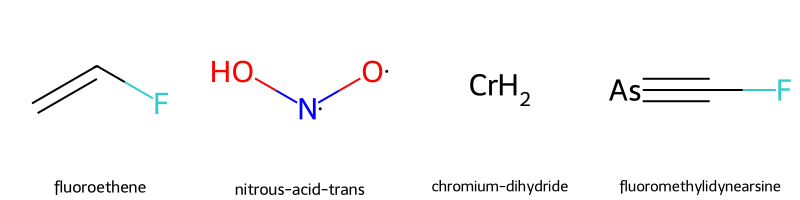

In [191]:
# Exibe as estruturas moleculares de todos os FPs
img1=Chem.Draw.MolsToGridImage(fp_list,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fp_list])
img1

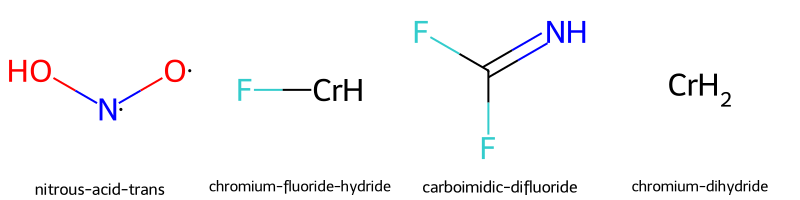

In [192]:
# Exibe as estruturas moleculares de todos os FPs para Random Florest
img1_rf=Chem.Draw.MolsToGridImage(fp_list_rf,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fp_list_rf])
img1_rf

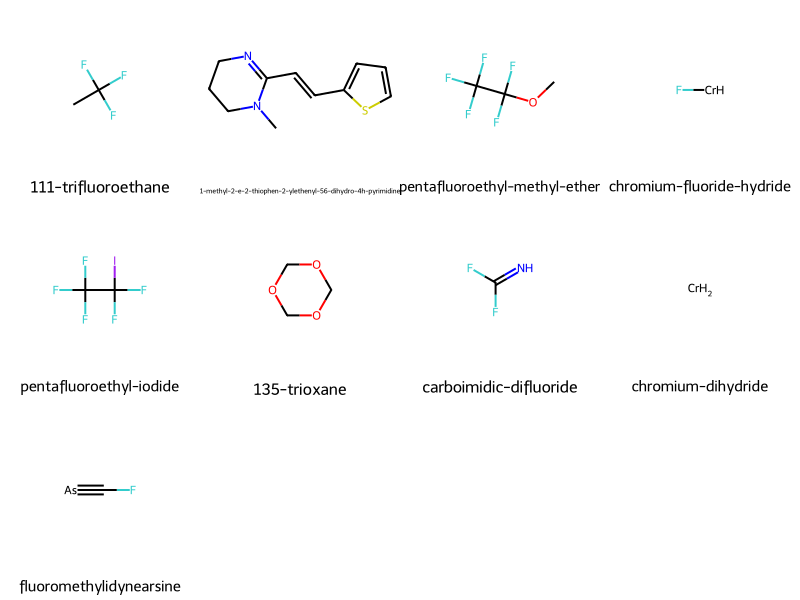

In [193]:
# Exibe as estruturas moleculares de todos os FPs para K-neighbors
img1_kn=Chem.Draw.MolsToGridImage(fp_list_kn,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fp_list_kn])
img1_kn

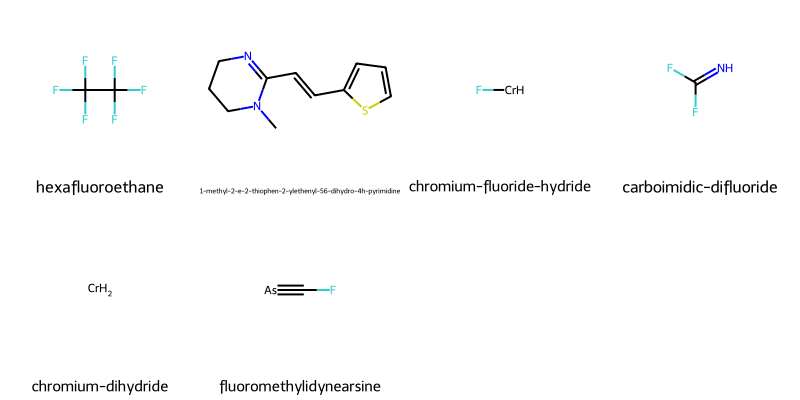

In [194]:
# Exibe as estruturas moleculares de todos os FPs para K-neighbors n = 10
img1_kn_1=Chem.Draw.MolsToGridImage(fp_list_kn_1,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fp_list_kn_1])
img1_kn_1

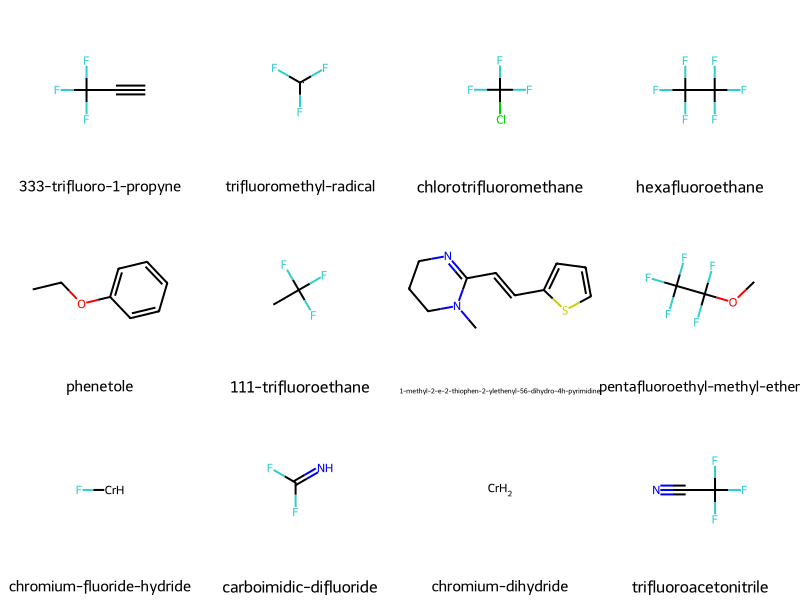

In [195]:
# Exibe as estruturas moleculares de todos os FPs para K-neighbors n = 50
img1_kn_2=Chem.Draw.MolsToGridImage(fp_list_kn_2,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fp_list_kn_2])
img1_kn_2

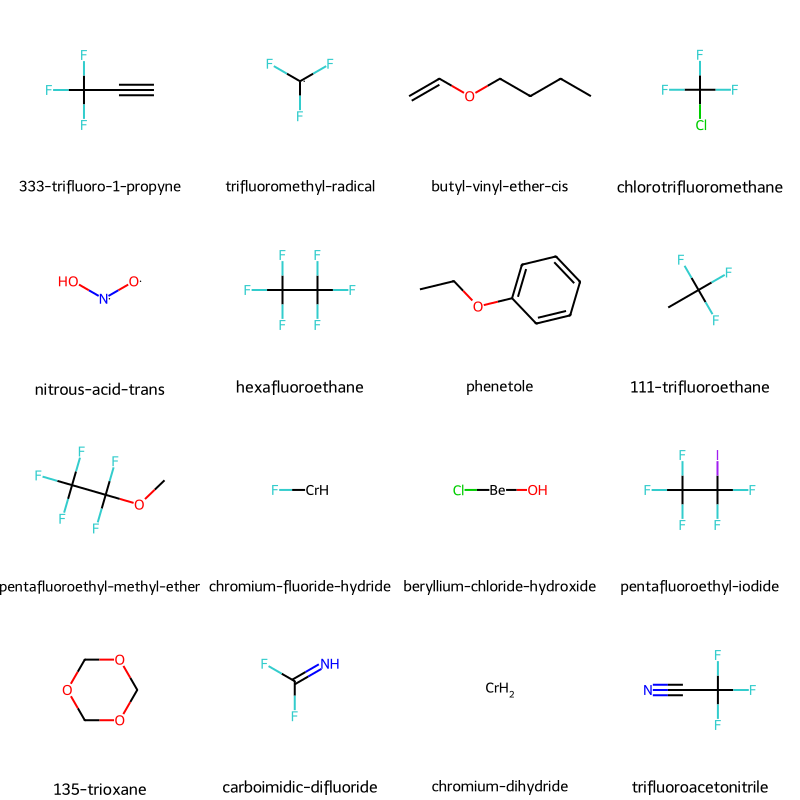

In [196]:
# Exibe as estruturas moleculares de todos os FPs para K-neighbors n = 100
img1_kn_3=Chem.Draw.MolsToGridImage(fp_list_kn_3,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fp_list_kn_3])
img1_kn_3

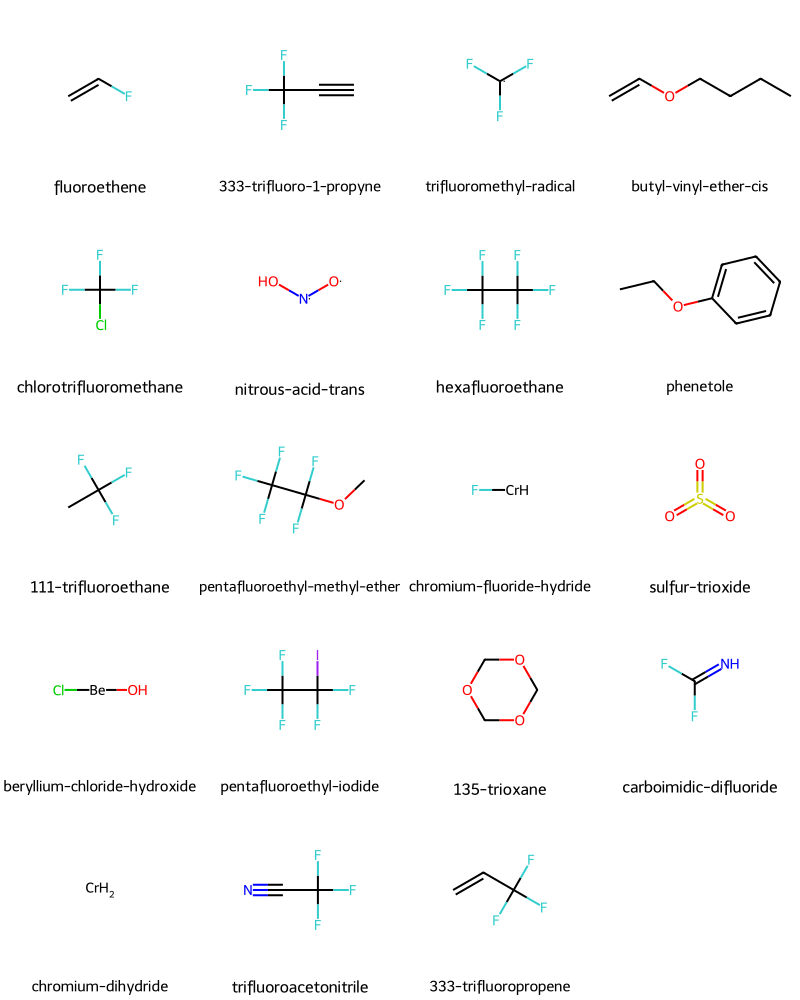

In [197]:
# Exibe as estruturas moleculares de todos os FPs para K-neighbors n = 150
img1_kn_4=Chem.Draw.MolsToGridImage(fp_list_kn_4,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fp_list_kn_4])
img1_kn_4

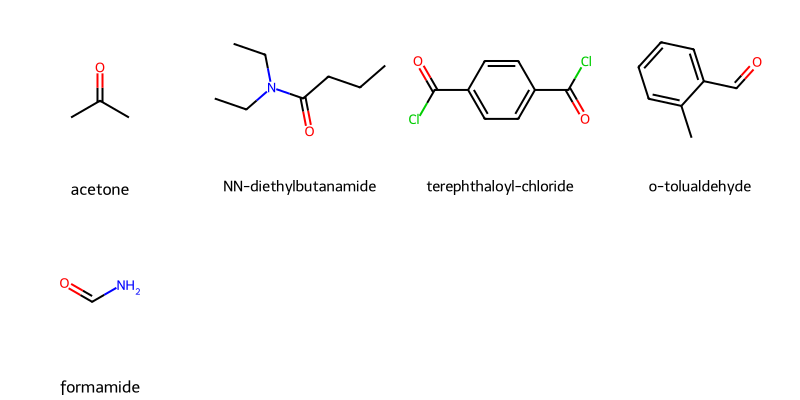

In [198]:
# Exibe as estruturas moleculares de todos os FNs
img2=Chem.Draw.MolsToGridImage(fn_list,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fn_list])
img2

**Exibindo FP ou FN Spectrum**

Edite o índice de moléculas abaixo para exibir o espectro de um determinado FP ou FN para inspeção. Você vê quaisquer características espectrais que possam explicar o erro?

In [199]:
# Para exibir o espectro de um FP na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
fp_idx=182
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [200]:
# Para exibir o espectro de um FN na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
fp_idx=183
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [201]:
# Para exibir o espectro de um FN na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
fp_idx=100
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [202]:
# Para exibir o espectro de um FP na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
# Para o Random Florest
fp_idx_rf=105
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx_rf,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [203]:
# Para exibir o espectro de um FP na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
# Para o K-Neighbors
fp_idx_kn=100
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx_kn,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [204]:
# Para exibir o espectro de um FP na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
# Para o K-Neighbors n = 10
fp_idx_kn_1=169
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx_kn_1,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [205]:
# Para exibir o espectro de um FP na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
# Para o K-Neighbors n = 50
fp_idx_kn_2=86
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx_kn_2,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [206]:
# Para exibir o espectro de um FP na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
# Para o K-Neighbors n = 100
fp_idx_kn_3=17
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx_kn_3,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [207]:
# Para exibir o espectro de um FP na linha abaixo,
# Insira o valor de índice da molécula que deseja ver na tabela acima
# Para o K-Neighbors n = 150
fp_idx_kn_4=223
# Depois mostre a figura
fp_mol=test.set_index('name').iloc[fp_idx_kn_4,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fp_mol.index, y=fp_mol, name=fp_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [208]:
# Para exibir o espectro de um FN na linha abaixo,
# Insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=137
# Depois mostre a figura
fn_mol=test.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

**Avaliando o desempenho geral do modelo**

À medida que você usa outros modelos de aprendizado de máquina para realizar essa tarefa de classificação, pode criar uma tabela para exibir as métricas de desempenho (precisão, sensibilidade e especificidade) para cada modelo. Para cada uma das variáveis abaixo, adicione as novas variáveis que você criou para os outros modelos, separadas por vírgulas.

In [209]:
# Criar variáveis contendo as métricas de desempenho para Árvore de decisão
model = ['Decision Tree', 'Random Florest', 'Random Florest thresholing 0.5', 'Random Florest test bad', 'Random Florest sem balanceamento dos dados', 'K-Neighbors', 'K-Neighbors n = 10', 'K-Neighbors n = 50', 'K-Neighbors n = 100', 'K-Neighbors n = 150', 'GaussianNB', 'GaussianNB var_smoothing = 1e-07', 'GaussianNB var_smoothing = 1e-04', 'GaussianNB var_smoothing = 1e-01', 'GaussianNB var_smoothing = 1']
acs=[dt_accuracy, dt_accuracy_rf, dt_accuracy_rf_1, dt_accuracy_rf_bad, dt_accuracy_rf_2, dt_accuracy_kn, dt_accuracy_kn_1, dt_accuracy_kn_2, dt_accuracy_kn_3, dt_accuracy_kn_4, dt_accuracy_nb, dt_accuracy_nb_1, dt_accuracy_nb_2, dt_accuracy_nb_3, dt_accuracy_nb_4]
sens=[dt_sensitivity, dt_sensitivity_rf, dt_sensitivity_rf_1, dt_sensitivity_rf_bad, dt_sensitivity_rf_2, dt_sensitivity_kn, dt_sensitivity_kn_1, dt_sensitivity_kn_2, dt_sensitivity_kn_3, dt_sensitivity_kn_4, dt_sensitivity_nb, dt_sensitivity_nb_1, dt_sensitivity_nb_2, dt_sensitivity_nb_3, dt_sensitivity_nb_4]
specs=[dt_specificity, dt_specificity_rf, dt_specificity_rf_1, dt_specificity_rf_bad, dt_specificity_rf_2, dt_specificity_kn, dt_specificity_kn_1, dt_specificity_kn_2, dt_specificity_kn_3, dt_specificity_kn_4, dt_specificity_nb, dt_specificity_nb_1, dt_specificity_nb_2, dt_specificity_nb_3, dt_specificity_nb_4]

Para criar uma tabela, defina os nomes e valores das colunas usando uma estrutura de dados do Dicionário e, em seguida, torne-a um DataFrame. Adicione os outros nomes de modelo na lista abaixo (entre aspas simples e separados por vírgulas) para adicioná-los à tabela.

In [210]:
# Fazer e exibir um DataFrame
d = {'Model':model,'Accuracy':acs, 'Sensitivity':sens,' Specificity':specs}
result = pd.DataFrame(data=d)

In [211]:
result

,Model,Accuracy,Sensitivity,Specificity
0,Decision Tree,0.96,0.88,0.98
1,Random Florest,0.98,1.00,0.98
2,Random Florest thresholing 0.5,0.97,0.93,0.97
3,Random Florest test bad,0.25,0.25,0.00
4,Random Florest sem balanceamento dos dados,0.98,1.00,0.98
5,K-Neighbors,0.96,1.00,0.95
6,K-Neighbors n = 10,0.97,1.00,0.97
7,K-Neighbors n = 50,0.95,1.00,0.94
8,K-Neighbors n = 100,0.93,1.00,0.92
9,K-Neighbors n = 150,0.92,1.00,0.90


*Avaliando o desempenho do modelo Random Florest para os dados de treinamento com drop*

In [212]:
# Criar variáveis contendo as métricas de desempenho para Árvore de decisão
model_drop = ['Random Florest drop 1', 'Random Florest drop 2', 'Random Florest drop 3', 'Random Florest drop 4', 'Random Florest drop 5']
acs_drop=[dt_accuracy_rf_drop1, dt_accuracy_rf_drop2, dt_accuracy_rf_drop3, dt_accuracy_rf_drop4, dt_accuracy_rf_drop5]
sens_drop=[dt_sensitivity_rf_drop1, dt_sensitivity_rf_drop2, dt_sensitivity_rf_drop3, dt_sensitivity_rf_drop4, dt_sensitivity_rf_drop5]
specs_drop=[dt_specificity_rf_drop1, dt_specificity_rf_drop2, dt_specificity_rf_drop3, dt_specificity_rf_drop4, dt_specificity_rf_drop5]

In [213]:
# Fazer e exibir um DataFrame
d_drop = {'Model':model_drop,'Accuracy':acs_drop, 'Sensitivity':sens_drop,' Specificity':specs_drop}
result_drop = pd.DataFrame(data=d_drop)

In [214]:
result_drop

,Model,Accuracy,Sensitivity,Specificity
0,Random Florest drop 1,0.98,0.98,0.98
1,Random Florest drop 2,0.98,1.00,0.98
2,Random Florest drop 3,0.98,1.00,0.98
3,Random Florest drop 4,0.98,1.00,0.98
4,Random Florest drop 5,0.98,1.00,0.98


In [215]:
drop = [1000, 800, 600, 400, 200]

<function matplotlib.pyplot.show(close=None, block=None)>

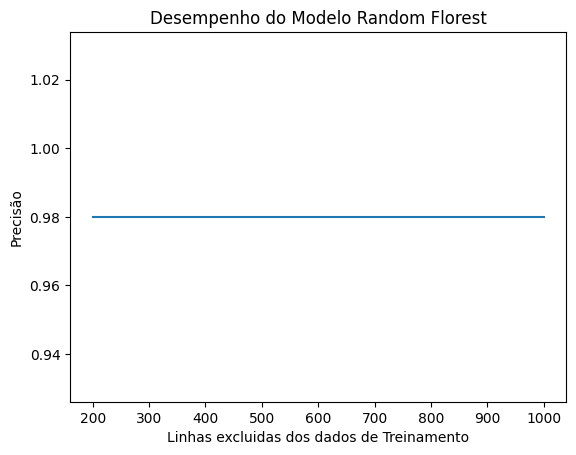

In [216]:
plt.plot(drop, acs_drop)
plt.xlabel("Linhas excluidas dos dados de Treinamento")
plt.ylabel("Precisão")
plt.title("Desempenho do Modelo Random Florest")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

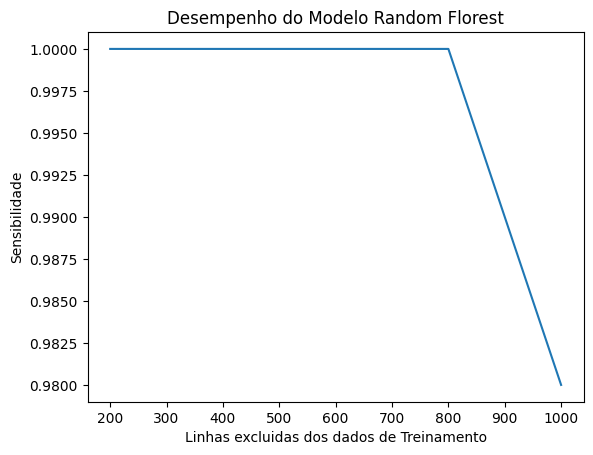

In [217]:
plt.plot(drop, sens_drop)
plt.xlabel("Linhas excluidas dos dados de Treinamento")
plt.ylabel("Sensibilidade")
plt.title("Desempenho do Modelo Random Florest")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

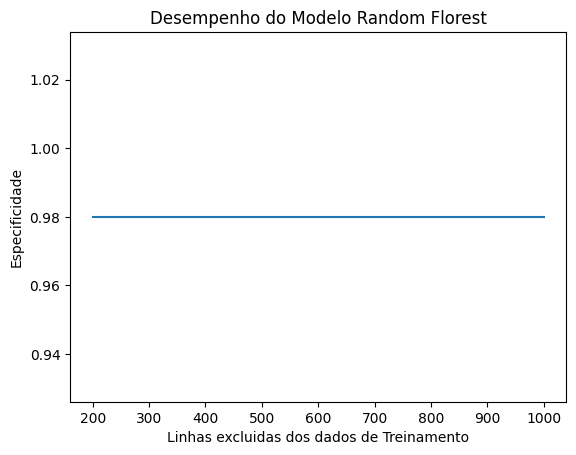

In [218]:
plt.plot(drop, specs_drop)
plt.xlabel("Linhas excluidas dos dados de Treinamento")
plt.ylabel("Especificidade")
plt.title("Desempenho do Modelo Random Florest")
plt.show

# **Classificação Multiclasse de Carbonil**

**Carregando os dados para classificação Multiclasse**

In [220]:
url_multi_ketone = "https://media.githubusercontent.com/media/nahanni-rodrigues/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/multi_ketone.csv"
url_multi_other = "https://media.githubusercontent.com/media/nahanni-rodrigues/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/multi_other.csv"
url_multi_test = "https://media.githubusercontent.com/media/nahanni-rodrigues/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/multi_test.csv"
url_multi_cbxl_acid = "https://media.githubusercontent.com/media/nahanni-rodrigues/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/multi_cbxl_acid.csv"

In [221]:
# Carregando os dados de treinamento e salvando na variável "train"
train_cbxl_acid = pd.read_csv(url_multi_cbxl_acid, index_col=0)
train_ketone = pd.read_csv(url_multi_ketone, index_col=0)
train_other = pd.read_csv(url_multi_other, index_col=0)
# Carregando os dados de teste e salvando na variável "test"
test_multi = pd.read_csv(url_multi_test, index_col=0)

**Normalizando os dados**

In [222]:
df_normalize(train_cbxl_acid)
df_normalize(train_ketone)
df_normalize(train_other)
df_normalize(test_multi)

**Aplicando o thresholding**

In [223]:
# Usar a função para aplicar o threshold aos dados de treinamento e teste
applyThreshold(train_cbxl_acid)
applyThreshold(train_ketone)
applyThreshold(train_other)
applyThreshold(test_multi)

**Dividindo o conjunto de treinamento e teste**

In [224]:
X_cbxl_acid,Y_cbxl_acid=splitXY(train_cbxl_acid)
X_ketone,Y_ketone=splitXY(train_ketone)
X_other,Y_other=splitXY(train_other)
X_test_multi,Y_test_multi=splitXY(test_multi)

In [225]:
X_test_cbxl,Y_test_cbxl=splitXY(test_multi, start_X = 5, start_Y = 3, end_Y = 4)

In [226]:
X_test_ketone,Y_test_ketone=splitXY(test_multi, start_X = 5, start_Y = 2, end_Y = 3)

In [227]:
X_test_other,Y_test_other=splitXY(test_multi, start_X = 5, start_Y = 4, end_Y = 5)

**Balanceamento dos dados**

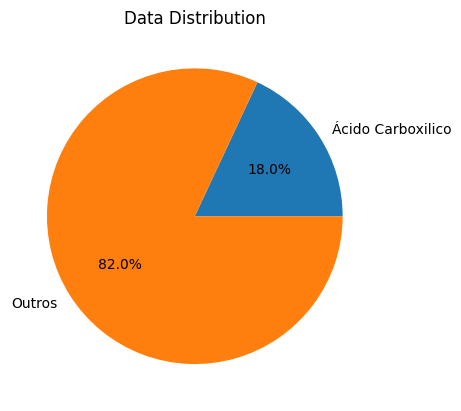

In [228]:
# Obtém o número total de moléculas nos dados de treinamento
total=len(Y_cbxl_acid)
# Determina quantos contêm uma carbonila
label1=Y_cbxl_acid.sum()
# Encontra o número sem carbonila por subtração
label0=total-label1
# Plota os dados
data=[label1,label0]
my_labels = 'Ácido Carboxilico', 'Outros'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

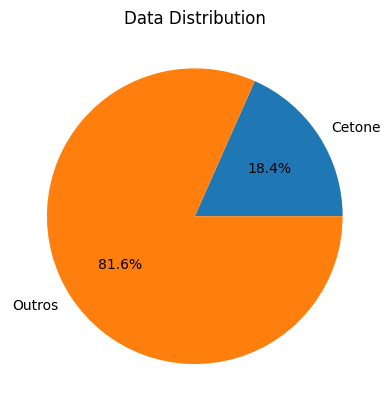

In [229]:
# Obtém o número total de moléculas nos dados de treinamento
total=len(Y_ketone)
# Determina quantos contêm uma carbonila
label1=Y_ketone.sum()
# Encontra o número sem carbonila por subtração
label0=total-label1
# Plota os dados
data=[label1,label0]
my_labels = 'Cetone', 'Outros'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

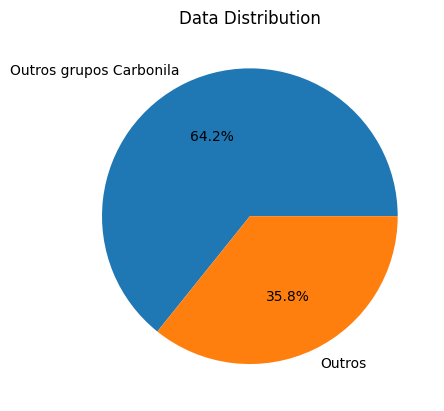

In [230]:
# Obtém o número total de moléculas nos dados de treinamento
total=len(Y_other)
# Determina quantos contêm uma carbonila
label1=Y_other.sum()
# Encontra o número sem carbonila por subtração
label0=total-label1
# Plota os dados
data=[label1,label0]
my_labels = 'Outros grupos Carbonila', 'Outros'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

In [231]:
%%capture
# Define o método SMOTE
sm = SMOTE(sampling_strategy='minority')
# Aplica SMOTE aos dados de treinamento
X_cbxl_acid, Y_cbxl_acid = sm.fit_resample(X_cbxl_acid,Y_cbxl_acid)

In [232]:
%%capture
# Define o método SMOTE
sm = SMOTE(sampling_strategy='minority')
# Aplica SMOTE aos dados de treinamento
X_ketone, Y_ketone = sm.fit_resample(X_ketone,Y_ketone)

In [233]:
%%capture
# Define o método SMOTE
sm = SMOTE(sampling_strategy='minority')
# Aplica SMOTE aos dados de treinamento
X_other, Y_other = sm.fit_resample(X_other,Y_other)

**Treinando o modelo Random Florest**

In [234]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_cbxl_acid = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_cbxl_acid.fit(X_cbxl_acid,Y_cbxl_acid)

RandomForestClassifier()

In [235]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_ketone = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_ketone.fit(X_ketone,Y_ketone)

RandomForestClassifier()

In [236]:
# Usar o algoritmo Random Florest com os parâmetros padrão
dt_rf_other = RandomForestClassifier()
# Ajustar o modelo usando o conjunto de dados de treinamento
dt_rf_other.fit(X_other,Y_other)

RandomForestClassifier()

**Fazendo previsões com os dados de teste**

In [237]:
train_ketone

,SMILES,name,ketone,500,502,504,506,508,510,512,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,CCOCCOCCOC(C)=O,2-2-ethoxyethoxyethyl-acetate,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CCCCCCCC(=O)OC,methyl-octanoate,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CCC(=O)N(C)C,NN-dimethylpropanamide,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,O=C1CCCCCN1,caprolactam,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CCC(=O)OC,methyl-propionate,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,CC(Cl)CCC(=O)O,4-chloropentanoic-acid,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,CC(N)=O,acetamide,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
313,O=CN1CCOCC1,4-formylmorpholine,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,O=CCO,glycolaldehyde,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [238]:
test_multi

,SMILES,name,ketone,carboxylic_acid,other,500,502,504,506,508,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,CC(=O)C=C(C)C,mesityl-oxide,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CCOC(=O)C=Cc1ccccc1,ethyl-trans-cinnamate,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C=CC(=O)OC,methyl-acrylate,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CC(=O)Oc1ccc2ccccc2c1,naphthalen-2-yl-acetate,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CCC(=O)NC,N-methylpropanamide,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CCC(Cl)C(=O)OC,methyl-2-chlorobutanoate,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,CC(=O)CC(C)C,4-methylpentan-2-one,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,O=CNc1ccccc1,formanilide,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,O=CCCCO,4-hydroxybutyraldehyde,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NCC(=O)O,glycine,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
Y_pred_rf_cbxl_acid = dt_rf_cbxl_acid.predict(X_test_cbxl)

In [240]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_cbxl_acid=np.round(accuracy_score(Y_test_cbxl,Y_pred_rf_cbxl_acid),2)
dt_sensitivity_rf_cbxl_acid=np.round(recall_score(Y_test_cbxl,Y_pred_rf_cbxl_acid),2)
dt_specificity_rf_cbxl_acid=np.round(recall_score(Y_test_cbxl,Y_pred_rf_cbxl_acid,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_cbxl_acid)+" Sensitivity: "+str(dt_sensitivity_rf_cbxl_acid)+" Specificity: "+str(dt_specificity_rf_cbxl_acid))

Accuracy: 0.8 Sensitivity: 0.0 Specificity: 1.0


In [241]:
Y_pred_rf_ketone = dt_rf_ketone.predict(X_test_ketone)

In [242]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_ketone=np.round(accuracy_score(Y_test_ketone,Y_pred_rf_ketone),2)
dt_sensitivity_rf_ketone=np.round(recall_score(Y_test_ketone,Y_pred_rf_ketone),2)
dt_specificity_rf_ketone=np.round(recall_score(Y_test_ketone,Y_pred_rf_ketone,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_ketone)+" Sensitivity: "+str(dt_sensitivity_rf_ketone)+" Specificity: "+str(dt_specificity_rf_ketone))

Accuracy: 0.91 Sensitivity: 0.4 Specificity: 1.0


In [243]:
Y_pred_rf_other = dt_rf_other.predict(X_test_other)

In [244]:
# Determinar a precisão, sensibilidade e especificidade comparando os rótulos previstos com os rótulos reais
dt_accuracy_rf_other=np.round(accuracy_score(Y_test_other,Y_pred_rf_other),2)
dt_sensitivity_rf_other=np.round(recall_score(Y_test_other,Y_pred_rf_other),2)
dt_specificity_rf_other=np.round(recall_score(Y_test_other,Y_pred_rf_other,pos_label=0),2)

# Exibir a precisão, sensibilidade e especificidade
print("Accuracy: "+str(dt_accuracy_rf_other)+" Sensitivity: "+str(dt_sensitivity_rf_other)+" Specificity: "+str(dt_specificity_rf_other))

Accuracy: 0.69 Sensitivity: 1.0 Specificity: 0.08


In [245]:
# Criar variáveis contendo as métricas de desempenho para Árvore de decisão
model_multi = ['Random Florest Cbxl Acid', 'Random Florest Ketone', 'Random Florest others']
acs_multi=[dt_accuracy_rf_cbxl_acid, dt_accuracy_rf_ketone, dt_accuracy_rf_other]
sens_multi=[dt_sensitivity_rf_cbxl_acid, dt_sensitivity_rf_ketone, dt_sensitivity_rf_other]
specs_multi=[dt_specificity_rf_cbxl_acid, dt_specificity_rf_ketone, dt_specificity_rf_other]

In [246]:
# Fazer e exibir um DataFrame
d_multi = {'Model':model_multi,'Accuracy':acs_multi, 'Sensitivity':sens_multi,' Specificity':specs_multi}
result_multi = pd.DataFrame(data=d_multi)

In [247]:
result_multi

,Model,Accuracy,Sensitivity,Specificity
0,Random Florest Cbxl Acid,0.80,0.0,1.00
1,Random Florest Ketone,0.91,0.4,1.00
2,Random Florest others,0.69,1.0,0.08


# **Conclusões**

Os dados de treinamento e de teste, considerados para as classificações binárias, para análise dos dados de teste "ruins", e para as classificações multi classe foram todos lidos, observados sua estrutura, e tratados com os diferentes métodos: normalização, etapa de Thresholding, divisão de rótulos e atributos, balanceamento dos dados (SMOTE).

Após a etapa de pré-processamento, os dados foram usados para treinamento de diferentes modelos de Machine Learning, sendo eles: Árvore de decisão, Árvore aleatória, Naive Bayes variando o parametro var_smooothing, K-vizinhos variando o parametro n_neighbors, avaliando o desempenho de cada modelo e as variações nos dados e nos parametros.

Foram montadas tabelas de performance para avaliar o desempenho dos modelos, Precisão (fração total de previsões corretas), Sensibilidade (Identificação correta de compostos contendo carbonila), e Especificidade (Identificação correta dos compostos sem carbonila).

*Resultado para Árvore Aleatória*

Os resultados obtidos para a Árvore de decisão encontrou dois Falso Positivos (moléculas CrH2, FC#(As)), e um falso negativo (O-tolualdehyde). Os valores de Accuracy: 0.99 Sensitivity: 0.98 Specificity: 0.99. Em relação a avaliação dos espectros das moléculas do grupo FP e FN, possuem picos característicos entre 1540-1870 cm^-1, que pode levar o algoritmo ao erro.

*Resultados para Random Florest*

A primeira avaliação do modelo Random Florest foi feita considerando os dados de treinamento e teste com as mesmas modificações iniciais, e valor de thresholding de 0,2. Com valores de Accuracy: 0.98 Sensitivity: 1.0 Specificity: 0.98. Foram encontrados 4 valores de falso positivo e nenhum de falso negativo.

A segunda avaliação foi feita alterando o valor de thresholding de 0,2, para 0,5, sem considerar as características espectrais menos intensas para a classificação. Com os valores de Accuracy: 0.96 Sensitivity: 0.91 Specificity: 0.97, mostrando que houve uma queda no desempenho do modelo quando não se leva em consideração essas características. Essas características menos intensas fazem com que o modelo tenha um melhor aprendizado, pois mais de um pico caracteriza a molécula, não apenas o o mais forte.

A terceira avaliação foi feita considerando os dados de teste "ruins", com quatro espectros da molécula contendo carbonila N-metilacetamida, onde apenas um está correto. Com os valores de Accuracy: 0.25 Sensitivity: 0.25 Specificity: 0. Ou seja, o modelo já treinado consegue identificar apenas o espectro correto, os demais ele não consegue fazer previsão de que não é do grupo funcional carbonila.

In [248]:
result

,Model,Accuracy,Sensitivity,Specificity
0,Decision Tree,0.96,0.88,0.98
1,Random Florest,0.98,1.00,0.98
2,Random Florest thresholing 0.5,0.97,0.93,0.97
3,Random Florest test bad,0.25,0.25,0.00
4,Random Florest sem balanceamento dos dados,0.98,1.00,0.98
5,K-Neighbors,0.96,1.00,0.95
6,K-Neighbors n = 10,0.97,1.00,0.97
7,K-Neighbors n = 50,0.95,1.00,0.94
8,K-Neighbors n = 100,0.93,1.00,0.92
9,K-Neighbors n = 150,0.92,1.00,0.90


In [249]:
test_bad

,SMILES,name,label,500,502,504,506,508,510,512,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,CNC(C)=O,N-methylacetamide,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CCC(C)=O,N-methylacetamide,1,0.476327,0.492596,0.508866,0.525135,0.540388,0.554624,0.569876,...,0.998983,0.998983,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,CNC(C)=O,N-methylacetamide,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CNC(C)=O,N-methylacetamide,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
# para exibir o espectro de um FN na linha abaixo,
# insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=0
# depois mostre a figura
fn_mol=test_bad.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [251]:
# para exibir o espectro de um FN na linha abaixo,
# insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=1
# depois mostre a figura
fn_mol=test_bad.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [252]:
# para exibir o espectro de um FN na linha abaixo,
# insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=2
# depois mostre a figura
fn_mol=test_bad.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [253]:
# para exibir o espectro de um FN na linha abaixo,
# insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=3
# depois mostre a figura
fn_mol=test_bad.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

Plotando os 4 espectros existentes nos dados de teste "ruins", pode-se observar a presença de picos fora do intervalo considerado para identificar compostos do grupo funcional carbonila, que é entre 1540-1870 cm^-1. Logo o modelo não consegue fazer essa previsão corretamente.

A quarta avaliação foi feita considerando que os dados não foram balanceados, ou seja, sem aplicar o SMOTE, fazendo com que exista mais dados que não são do grupo funcional carbonila para treinar o modelo Random Florest. Com os valores de Accuracy: 0.99 Sensitivity: 1.0 Specificity: 0.98, mostra que apesar disso, o modelo não beneficia a classe maioritária, ele consegue apesar de poucos dados, obter resultados satisfatórios pra prever os espectros correspondentes ao grupo funcional carbonila.

A quinta avaliação foi feita considerando diferentes tamanhos do conjunto de treinamento para o modelo Random Florest. Foram feitas as seguintes considerações:
* 1° Excluindo 1000 últimos pontos dos dados de treinamento;
* 2° Excluindo 800 últimos pontos dos dados de treinamento;
* 3° Excluindo 600 últimos pontos dos dados de treinamento;
* 4° Excluindo 400 últimos pontos dos dados de treinamento;
* 5° Excluindo 200 últimos pontos dos dados de treinamento.

Foram feitos os treinamentos para os diferentes tamanhos, onde se obteve a tabela de desempenho abaixo:


In [254]:
result_drop

,Model,Accuracy,Sensitivity,Specificity
0,Random Florest drop 1,0.98,0.98,0.98
1,Random Florest drop 2,0.98,1.00,0.98
2,Random Florest drop 3,0.98,1.00,0.98
3,Random Florest drop 4,0.98,1.00,0.98
4,Random Florest drop 5,0.98,1.00,0.98


Houve uma queda de desempenho de 1% considerando a acurácia do modelo, ou seja, a percentagem de acertos do grupo funcional carbonila. Os demais permaneceram estáveis.

# **Classificação multiclasse - Random Florest**

Os dados de cada grupo foram utilizados para treinar os modelos Random Florest, e ver o desempenho para a classificação multiclasse. A tabela abaixo mostra os resultados obtidos:

In [255]:
result_multi

,Model,Accuracy,Sensitivity,Specificity
0,Random Florest Cbxl Acid,0.80,0.0,1.00
1,Random Florest Ketone,0.91,0.4,1.00
2,Random Florest others,0.69,1.0,0.08


Em relação aos resultados obtidos para a classificação binária, existe uma queda brusca em relação ao desempenho, principalmente considerando a Sensibilidade (Identificação correta de compostos contendo carbonila) para a classificação do Ácido carboxilico e a Cetona, e Especificidade (Identificação correta dos compostos sem carbonila) para os demais grupos. O desempenho varia entre as três classificações. Plotando os espectros de cetonas e ácidos:

In [256]:
# para exibir o espectro de um FN na linha abaixo,
# insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=0
# depois mostre a figura
fn_mol=test_multi.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [257]:
# para exibir o espectro de um FN na linha abaixo,
# insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=6
# depois mostre a figura
fn_mol=test_multi.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [258]:
# para exibir o espectro de um FN na linha abaixo,
# insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=9
# depois mostre a figura
fn_mol=test_multi.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

In [259]:
# para exibir o espectro de um FN na linha abaixo,
# insira o valor de índice da molécula que você deseja ver na tabela acima
fn_idx=11
# depois mostre a figura
fn_mol=test_multi.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)

Os gráficos mostram que as Cetonas possuem picos característicos, enquanto os espectros dos ácidos não possuem nenhum, é apenas uma reta. E isso faz com que elas sejam distintas.